<a href="https://colab.research.google.com/github/Mayank0195/Capstone_Project_ML_Classification/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The main aim of the project is to predict the risk of Coronary Heart Disease (CHD) given a set of variables. The prediction can be of 2 types, Yes or No.

## Data Description

### This data holds 3390 rows and 17 columns, which have been explained below.

## Project Process

### 1.   Data Cleaning
### 2.   Exploratory Data Analysis
### 3.   Data Transformation
### 4.   Modelling and Evaluation
### 5.   Hyperparameter Tuning


**Importing all the necessary modules into the system**



In [1]:
import pandas as pd
import numpy as np

# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# importing drive on the volab notebook for the easy access of the data provided 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#importing the pathway for the Cardiovascular risk Dataset.csv
data=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone_Project_ML_Classification/data_cardiovascular_risk.csv')
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
data = data.drop(['id'], axis = 1)

In [5]:
data.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
data.shape

(3390, 16)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


This shows an overview of the Columns, non-null count and the data types of the dataset

Attributes:
* **sex**: male(0) or female(1);(Nominal)
* **age**: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
* **currentSmoker**: whether or not the patient is a current smoker (Nominal)
* **cigsPerDay**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
* **BPMeds**: whether or not the patient was on blood pressure medication (Nominal)
* **prevalentStroke**: whether or not the patient had previously had a stroke (Nominal)
* **prevalentHyp**: whether or not the patient was hypertensive (Nominal)
* **diabetes**: whether or not the patient had diabetes (Nominal)
* **totChol**: total cholesterol level (Continuous)
* **sysBP**: systolic blood pressure (Continuous)
* **diaBP**: diastolic blood pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **heartRate:** heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of a large number of possible values.)
* **glucose:** glucose level (Continuous)
* **10 year risk of coronary heart disease CHD** (binary: “1” means “Yes”, “0” means “No”) - Target Variable

In [8]:
# Renaming the columns
data.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [9]:
data

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


# **Data Inspecting and Cleaning**

In [10]:
data.isnull().sum()

age                    0
education             87
sex                    0
is_smoking             0
cigs_per_day          22
bp_meds               44
prevalent_stroke       0
prevalent_hyp          0
diabetes               0
total_cholesterol     38
systolic_bp            0
diastolic_bp           0
bmi                   14
heart_rate             1
glucose              304
ten_year_chd           0
dtype: int64

It shows the number of np.nan or null values or missing values are present in the dataset:

* **education**:  87
* **cigs_per_day**: 22
* **bp_Meds**:     44
* **total_cholesterol**:    38
* **bmi**:        14
* **heart_rate**:   1
* **glucose**:   304



In [11]:
data.duplicated().sum()

0

### As we start with a limited set of rows of 3390, we must try to fill the null values strategically instead of dropping them.

### As 'education' and 'BPMeds' are categorical variables we will use mode to fill the null values

In [12]:
# Filling null values of education
data['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [13]:
# Understanding value counts of BP Meds
data['bp_meds'].value_counts()

0.0    3246
1.0     100
Name: bp_meds, dtype: int64

In [14]:
# Creating a function to fill null values of categorical columns with mode
def mode_fillna(df , columns):
  ''' Null values of categorical columns are filled with the mode of the column'''
  for column in columns:
    df[column] = df[column].fillna(df[column].mode()[0])

In [15]:
# Applying the function to fill null values of the column with mode
mode_fillna(df = data, columns = ['education','bp_meds'])

## **As the columns 'cigsPerDay', 'totChol','BMI','heartRate' and 'glucose' are continous in nature and also these columns have outliers, median will be useful to fill the null values.**

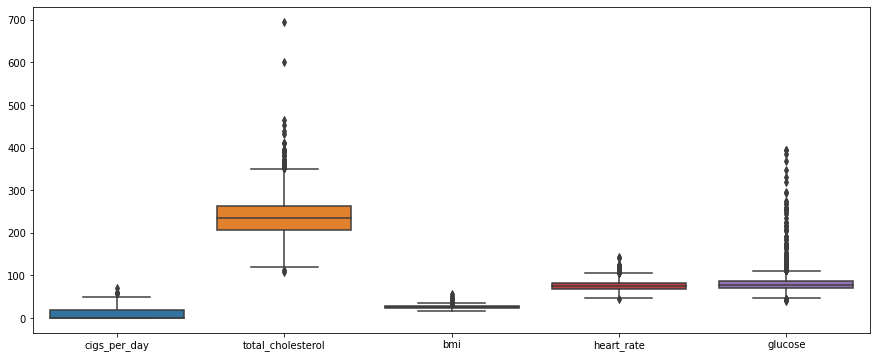

In [16]:
# Distribution of the continous columns with null values
plt.figure(figsize=(15,6))
sns.boxplot(data=data[['cigs_per_day','total_cholesterol','bmi','heart_rate','glucose']])

In [17]:
# Creating a function to fill null values of continous columns with median
def median_fillna(df, columns):
  ''' Null values of continous columns are filled with the median of the column '''
  for column in columns:
    df[column] = df[column].fillna(df[column].median())

In [18]:
# Applying the function to fill null values of continous columns with the median
median_fillna(df = data, columns = ['cigs_per_day','total_cholesterol','bmi','heart_rate','glucose'])

In [19]:
# Checking for null values after treating the null values
data.isna().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64

In [20]:
data.head()

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [21]:
# Statistical Description of data after treating null values
data.describe(include = 'all')

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
count,3390.000000,3390.000000,3390,3390,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.946018,NaN,NaN,9.010619,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,81.720059,0.150737
std,8.592878,1.017568,NaN,NaN,11.862839,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.161265,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000,0.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   int64  
 1   education          3390 non-null   float64
 2   sex                3390 non-null   object 
 3   is_smoking         3390 non-null   object 
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   int64  
 7   prevalent_hyp      3390 non-null   int64  
 8   diabetes           3390 non-null   int64  
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_chd       3390 non-null   int64  
dtypes: float64(9), int64(5),

**All null values have been successfully filled strategically.**

In [23]:
# No cigarettes smoked though the smoking column is yes
data.loc[(data['is_smoking'] == 'YES') & (data['cigs_per_day'] == 0)]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
422,55,1.0,F,YES,0.0,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,3.0,M,YES,0.0,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,1.0,M,YES,0.0,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,78.0,0
491,61,1.0,F,YES,0.0,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,1.0,F,YES,0.0,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,54,1.0,M,YES,0.0,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,47,2.0,F,YES,0.0,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,49,1.0,F,YES,0.0,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,57,1.0,F,YES,0.0,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,49,2.0,F,YES,0.0,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


## **As seen above there are entries where the 'is_smoking' column says 'YES' but there are no cigarettes smoked.**

In [24]:
# Value counts before correction
data['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [25]:
# Correcting the 'is_smoking' column to 'NO' where there are no cigarettes smoked
data.loc[(data['is_smoking'] == 'YES') & (data['cigs_per_day'] == 0), 'is_smoking'] = 'NO'

In [26]:
# Values counts after correction
data['is_smoking'].value_counts()

NO     1725
YES    1665
Name: is_smoking, dtype: int64

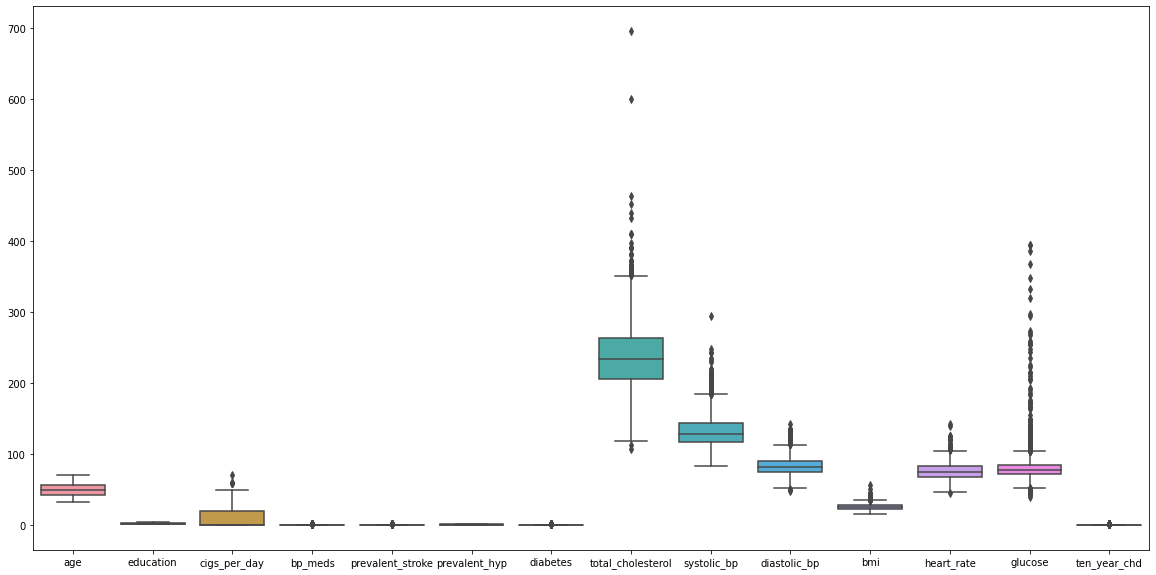

In [27]:
# Boxplot for all columns
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

In [28]:
# Function which returns columns with risk of outlier removal
def outlier_cal(columns):
  ''' Returns a dataframe showing risk of removal of outliers'''
  outlier_df = pd.DataFrame(columns=['Column', 'Upper Limit', 'Lower Limit', 'Upper Removal', 'Lower Removal', '% of Risk'])
  
  for column in columns:
    q3 = data[column].quantile(0.75)
    q1 = data[column].quantile(0.25)
    iqr = q3 - q1
    ul = q3 + (1.5* iqr)
    ll = q1 - (1.5* iqr)
  
    upper_removal = dict(data[data[column] > ul]['ten_year_chd'].value_counts())
    lower_removal = dict(data[data[column] < ll]['ten_year_chd'].value_counts())

    input_dict = {'Column' : column,
                  'Upper Limit' : ul,
                  'Lower Limit' : ll,
                  'Upper Removal' : upper_removal,
                  'Lower Removal' : lower_removal,
                  '% of Risk' : upper_removal[1]*100/len(data[data[column] > ul])}

    outlier_df = outlier_df.append(input_dict, ignore_index = True)

  return outlier_df

In [29]:
# Applying the function created
outlier_cal(['cigs_per_day','total_cholesterol','bmi','heart_rate','glucose'])

,Column,Upper Limit,Lower Limit,Upper Removal,Lower Removal,% of Risk
0,cigs_per_day,50.00000,-30.00000,"{0: 7, 1: 2}",{},22.222222
1,total_cholesterol,351.00000,119.00000,"{0: 30, 1: 11}","{0: 1, 1: 1}",26.829268
2,bmi,35.44875,15.57875,"{0: 62, 1: 17}",{},21.518987
3,heart_rate,105.50000,45.50000,"{0: 50, 1: 13}",{0: 1},20.634921
4,glucose,104.50000,52.50000,"{0: 143, 1: 57}","{0: 13, 1: 1}",28.500000


### **Removable Outliers are detected in totChol and sysBP columns of our dataset. Outliers in all other numerical columns are important and thus cannot be removed.**

In [30]:
data['total_cholesterol'].max()

696.0

The Outlier present in totChol is 696.

In [31]:
data.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose',
       'ten_year_chd'],
      dtype='object')

In [32]:
data['systolic_bp'].max()

295.0

The Outlier present in sysBP is 295.

In [33]:
data = data[data['total_cholesterol']<696.0]
data = data[data['systolic_bp']<250.0]
data.shape

(3388, 16)

# **Exploratory Data Analysis**

## Focus on the dependent variable
### The dependent variable here is the 'TenYearCHD' column which states the risk of coronary heart disease in the next 10 years.
### It is a binary variable, i.e it contains 0 and 1. 0 meaning no risk of heart disease and 1 meaning risk of heart disease.
### As our dependent variable is a discrete categorical variable this makes it a classification problem.

In [34]:
data.describe()

,age,education,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
count,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000,3388.000000
mean,49.537485,1.946576,9.013282,0.029516,0.006494,0.314935,0.025679,236.899646,132.546045,82.866440,25.789805,75.966647,81.722845,0.150531
std,8.591786,1.017609,11.865330,0.169273,0.080332,0.464559,0.158199,44.310123,22.119280,11.993525,4.102068,11.966014,23.167193,0.357644
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.500000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,27.992500,83.000000,85.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,248.000000,142.500000,56.800000,143.000000,394.000000,1.000000


An overall Statistical Information is shown

It is clearly evident that none of the data is missing in columns.
It also shows the mean, standard deviation and other statistical metrices of the dataset
It also shows the categorical data of the dataset since they were already converted into discrete numerical values

,age,education,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
age,1.000000,-0.170221,-0.191184,0.122262,0.059108,0.308348,0.108010,0.275659,0.404595,0.220435,0.136181,-0.003384,0.112693,0.224056
education,-0.170221,1.000000,0.013874,-0.019981,-0.031872,-0.081189,-0.051998,-0.018617,-0.130988,-0.059672,-0.135240,-0.038626,-0.039426,-0.050909
cigs_per_day,-0.191184,0.013874,1.000000,-0.035769,-0.041597,-0.077729,-0.048155,-0.025663,-0.099523,-0.067542,-0.099276,0.066578,-0.066496,0.068617
bp_meds,0.122262,-0.019981,-0.035769,1.000000,0.116176,0.257211,0.070917,0.082744,0.262933,0.199581,0.087927,0.018269,0.061338,0.087526
prevalent_stroke,0.059108,-0.031872,-0.041597,0.116176,1.000000,0.071768,0.010108,-0.010683,0.058237,0.047480,0.017126,-0.019125,0.023653,0.068732
prevalent_hyp,0.308348,-0.081189,-0.077729,0.257211,0.071768,1.000000,0.082760,0.156627,0.701730,0.612967,0.299019,0.149648,0.083196,0.165944
diabetes,0.108010,-0.051998,-0.048155,0.070917,0.010108,0.082760,1.000000,0.060640,0.125422,0.061562,0.088062,0.039912,0.609752,0.103864
total_cholesterol,0.275659,-0.018617,-0.025663,0.082744,-0.010683,0.156627,0.060640,1.000000,0.198429,0.155167,0.116079,0.083373,0.061627,0.096194
systolic_bp,0.404595,-0.130988,-0.099523,0.262933,0.058237,0.701730,0.125422,0.198429,1.000000,0.780921,0.328144,0.176271,0.140019,0.209600
diastolic_bp,0.220435,-0.059672,-0.067542,0.199581,0.047480,0.612967,0.061562,0.155167,0.780921,1.000000,0.377278,0.173630,0.069933,0.133472


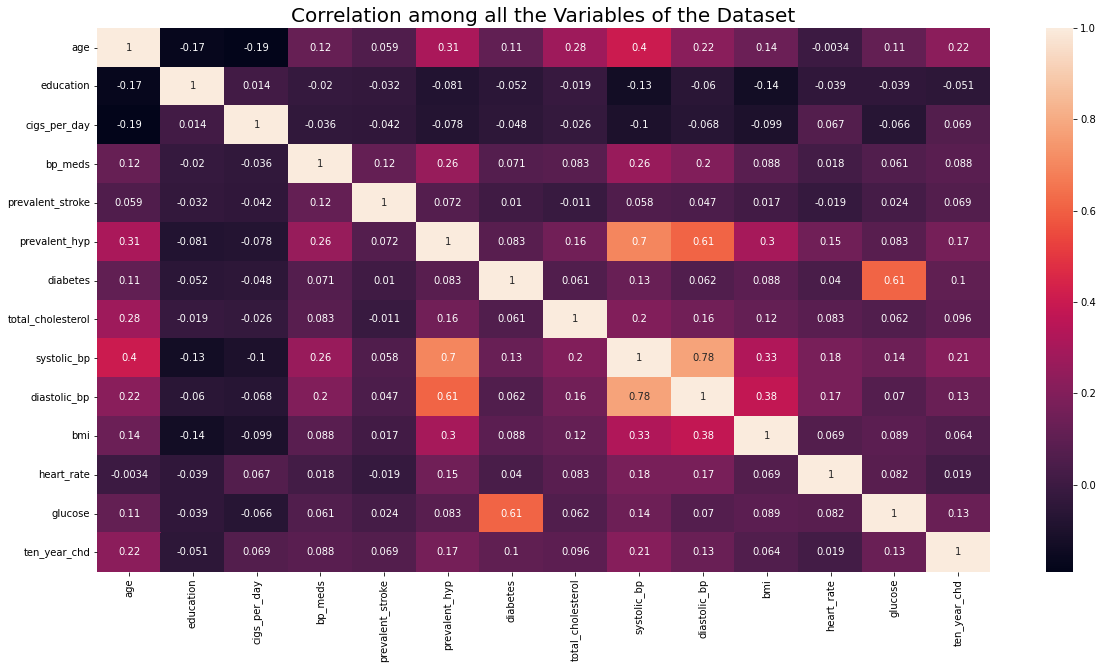

In [35]:
#Checking relationship between variables
cor=data.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

Compared to all the independent data, the correlation coefficient between education and and target variable TenYearCHD is very low and actually negativ

## **1. Univariate Analysis**

In [36]:
data.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose',
       'ten_year_chd'],
      dtype='object')

In [37]:
categorical_features = ['sex', 'education', 'is_smoking', 'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes']

In [38]:
for feature in categorical_features:
    print(feature,':')
    print(data[feature].value_counts())
    print("-----------------")

sex :
F    1922
M    1466
Name: sex, dtype: int64
-----------------
education :
1.0    1476
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64
-----------------
is_smoking :
NO     1724
YES    1664
Name: is_smoking, dtype: int64
-----------------
bp_meds :
0.0    3288
1.0     100
Name: bp_meds, dtype: int64
-----------------
prevalent_stroke :
0    3366
1      22
Name: prevalent_stroke, dtype: int64
-----------------
prevalent_hyp :
0    2321
1    1067
Name: prevalent_hyp, dtype: int64
-----------------
diabetes :
0    3301
1      87
Name: diabetes, dtype: int64
-----------------


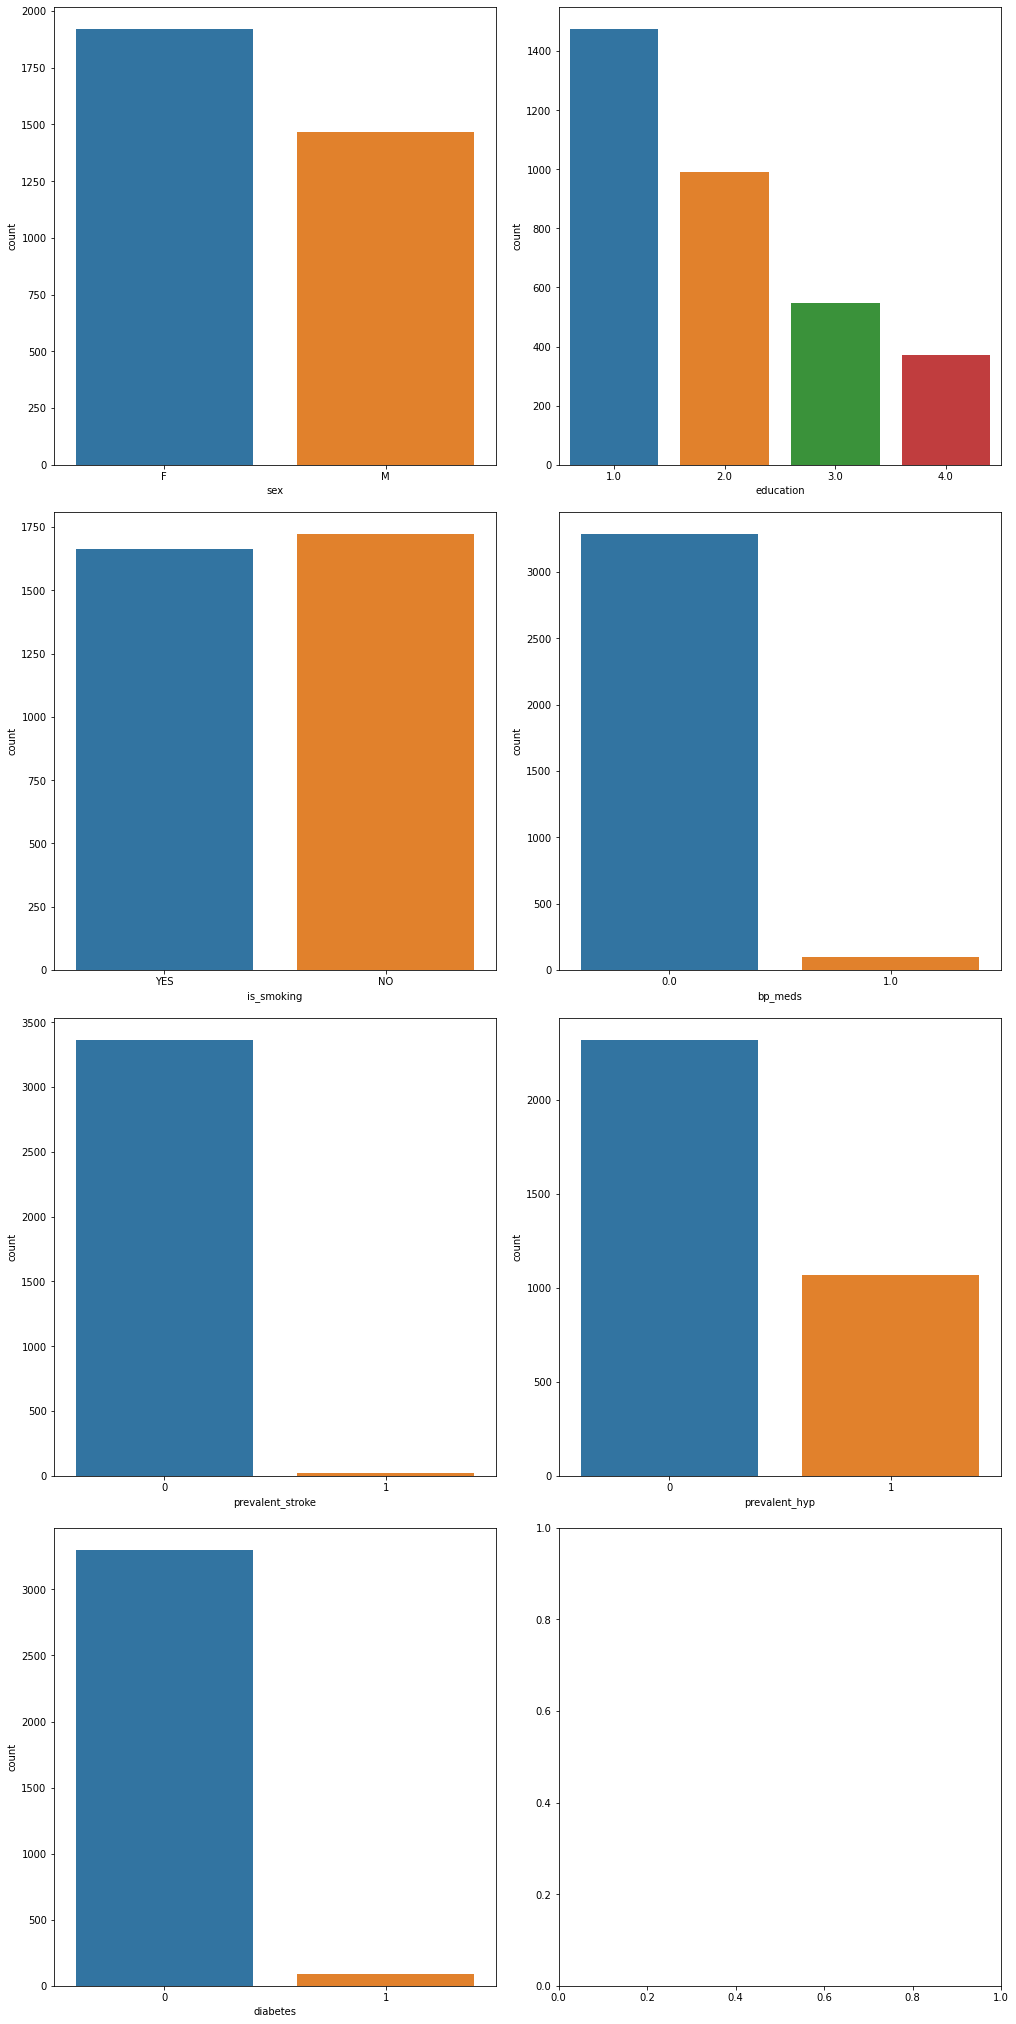

In [39]:
num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=data, ax=axs[row][pos])

### The graphs above show, categorical columns in the form of countplots, we can understand that:

*   Females are more in proportion to men by a small margin.
*   There are more non-smokers than smokers by a small margin, both are around 1600 each.
*   Around 1500 people have an education level 1, and almost 400 people have an education level of 4. The levels are not defined. 
*   More than 3000 people are not on BP medication
*   Only a small number of people have suffered a stroke previously.
*   Around 1000 people were hypertensive.
*   A large number (> 3000) of the people do not have diabetes.

### **Numerical Features**

In [40]:
data.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose',
       'ten_year_chd'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


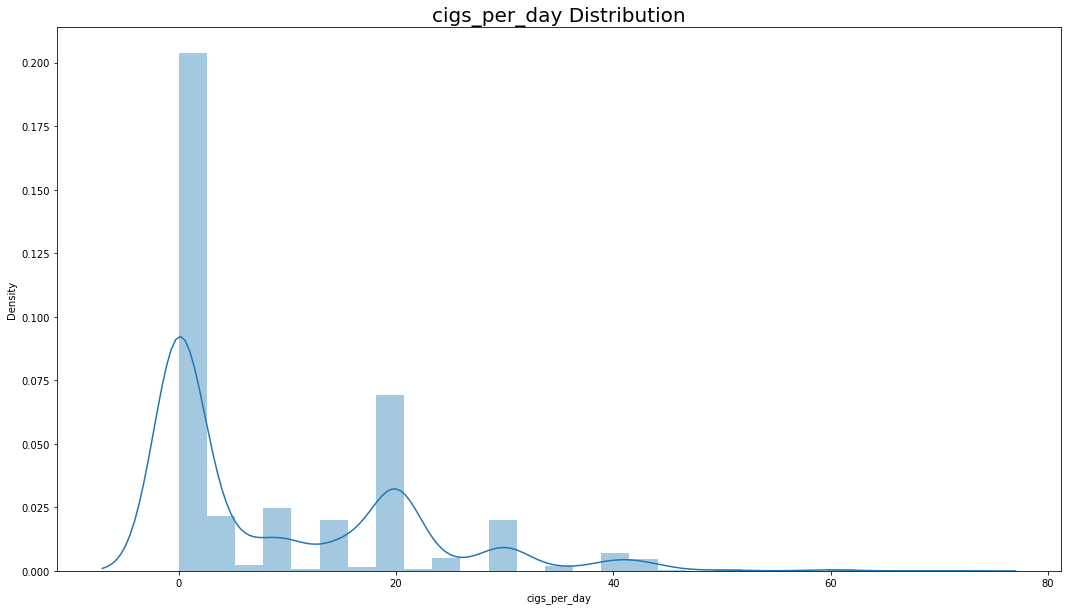

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


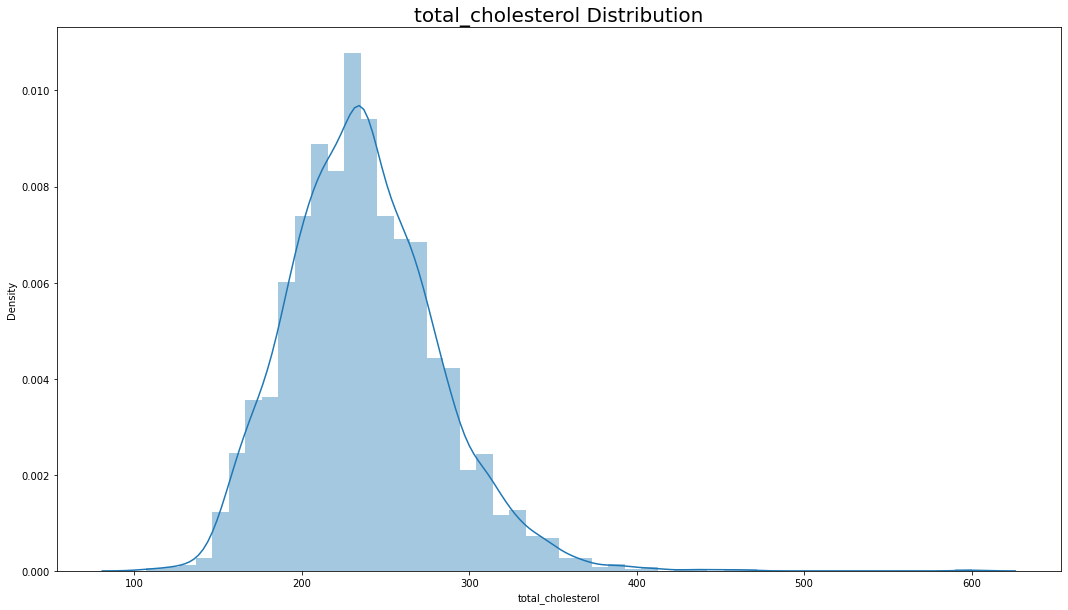

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


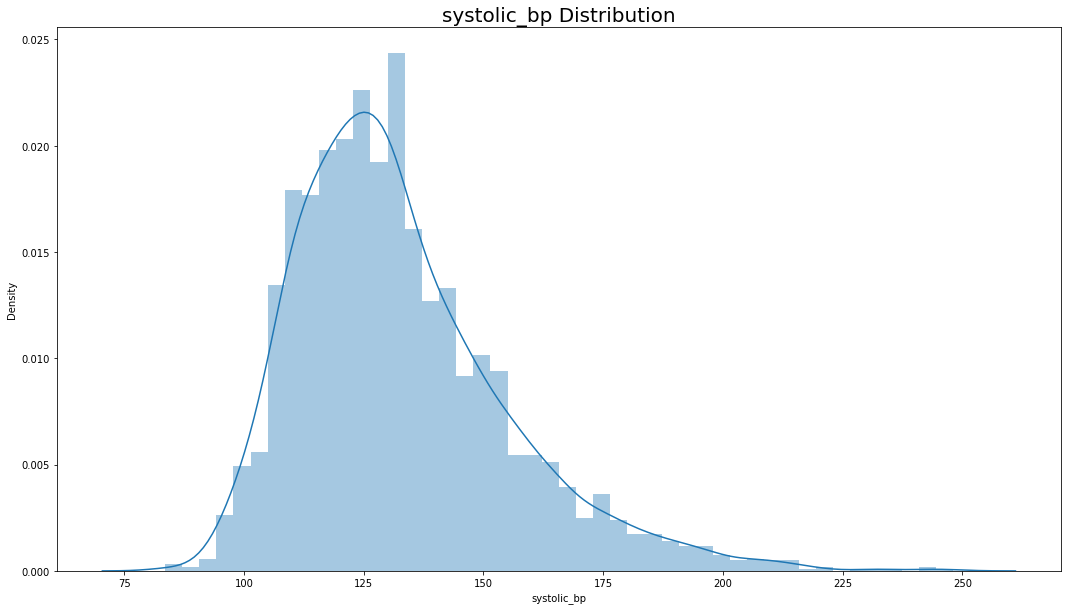

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


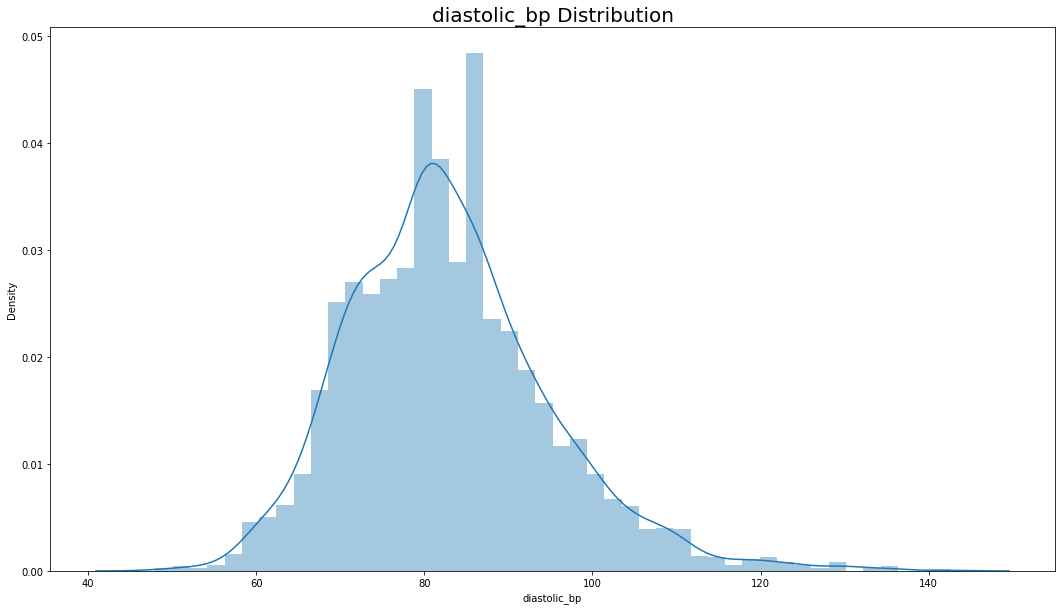

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


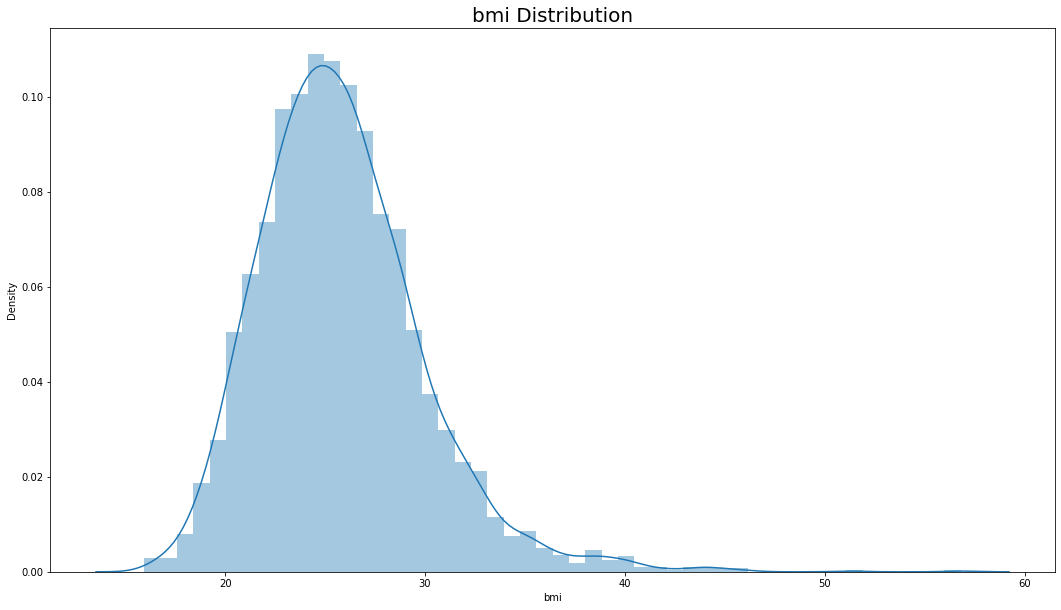

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


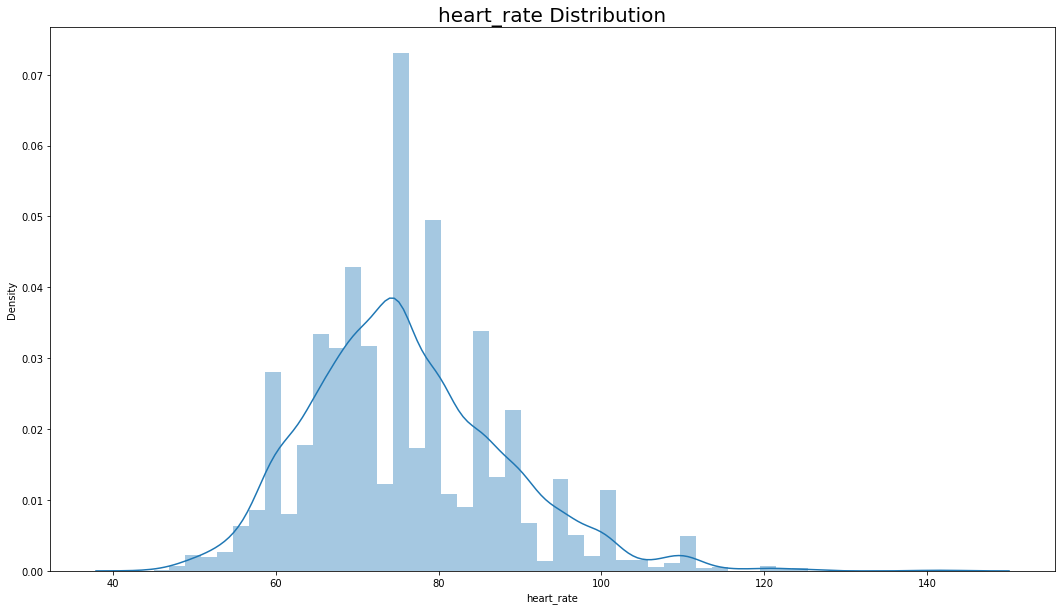

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


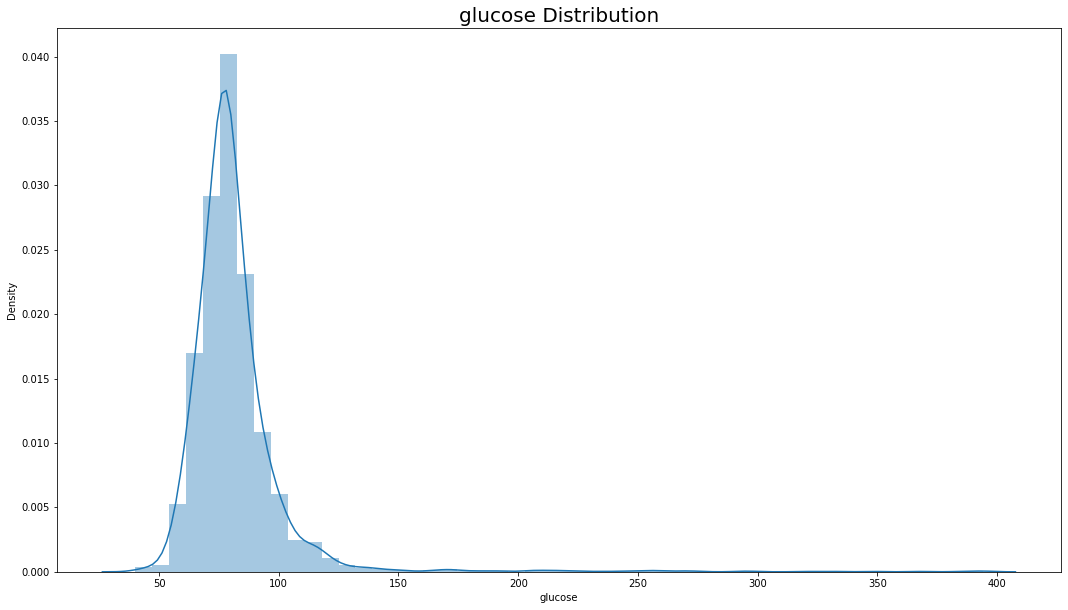

In [41]:
numeric_features = ['cigs_per_day', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']
for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.distplot(data[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

Among the numerical features:

* totChol, sysBP, diaBP and BMI has an uniform distribution and the rest are unevenly distributed
* cigsPerDay has a highly uneven distribution with the most data present in 0
* cigsPerDay and sysBP shows quite a bit and slight right skewness respectively.

### As seen from the above histograms, we can understand that :

*   Age ranges from 35 years to 70 years and is almost normally distributed, with most people belonging to an age group of 40.
*   Cigarettes smoked per day on an average are mainly 0, but 20 cigarettes a day are also prevalent.
*   Cholestrol ranges form 100 to 700, with most belonging to 150 to 350.
*   Systolic BP ranges mainly from 100 to 200.
*   Diastolic BP ranges mainly from 60 to 120.
*   BMI ranges mainly from 16 to 40.
*   Heart rate ranges from 40 to 110 and most occurances are around 75.
*   Glucose ranges mainly from 50 to 125, rest seem like outliers with extreme numbers but cannot be ignored as these numbers can cause risk of heart disease.

### We can understand from the data that, it has wide range of numbers, which indicates that both healthy and unhealthy people are considered. To get a clear understanding of risk of heart disease all these categories play an important role, especially those which are on the higher end as these extreme numbers may make a person more vulnerable to heart disease.


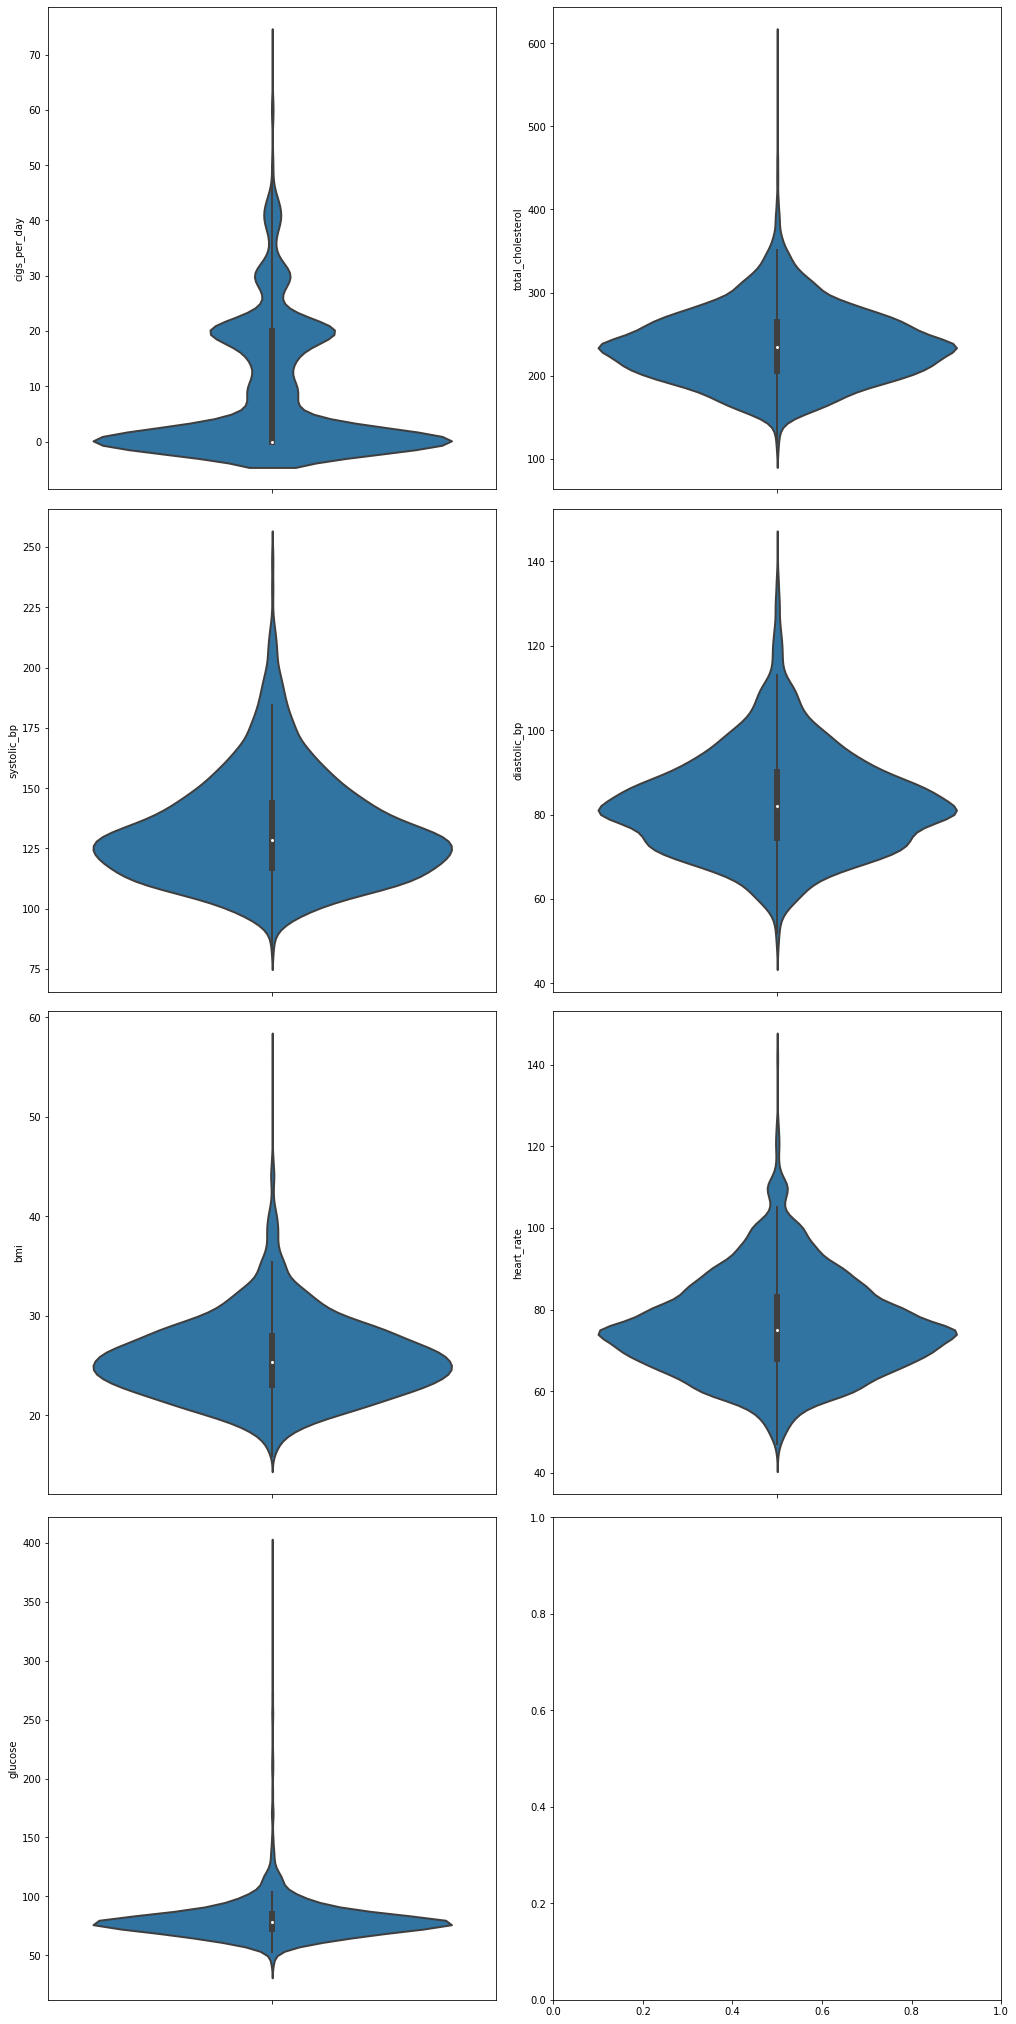

In [42]:
num_plots = len(numeric_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
color = ['m', 'g', 'b', 'r', 'y', 'v', 'o']
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(numeric_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.violinplot(y=var, data=data, ax=axs[row][pos], linewidth=2)

For the same numerical features:

cigsPerDay has uneven distribution although most of the data is concentrated on 0
The majority portions of the following columns lie in the range:
* totChol: 150 to 300
* sysBP: 100 to 150
* diaBP: 60 to 100
* BMI: 20 to 30
* heartRate: 50 to 100
* glucose: 50 to 150

### **Target Variable**

In [43]:
data.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose',
       'ten_year_chd'],
      dtype='object')

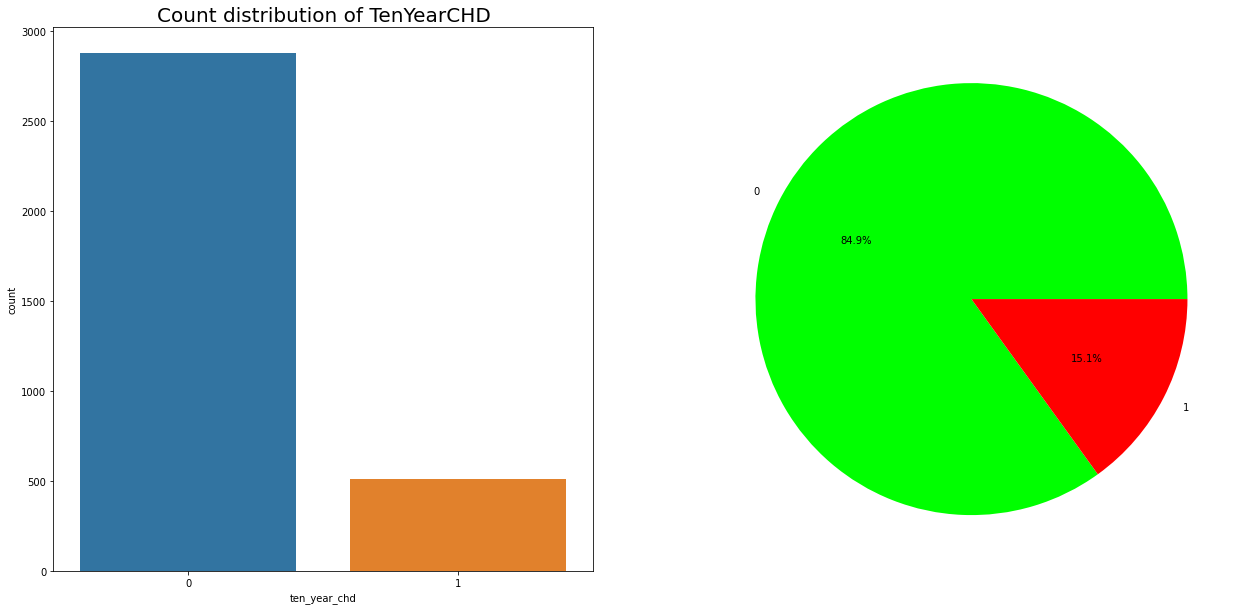

In [44]:
#Distribution of outcome variable, Heart Disease
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x='ten_year_chd', data=data)
plt.title("Count distribution of TenYearCHD", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(data['ten_year_chd'].value_counts(),autopct="%1.1f%%",labels=labels,colors=["lime","red"])
plt.show()

The distribution is highly imbalanced. As in, the number of negative cases outweigh the number of positive cases. This would lead to class imbalance problem while fitting our models. Therefore, this problem needs to be addressed and taken care of.

## **2. Bivariate Analysis**
Relationship between education and cigsPerDay

In [45]:
#Grouping education and cigsPerDay
graph_1 = data.groupby("education", as_index=False).cigs_per_day.mean()

(array([ 2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 7 Text major ticklabel objects>)

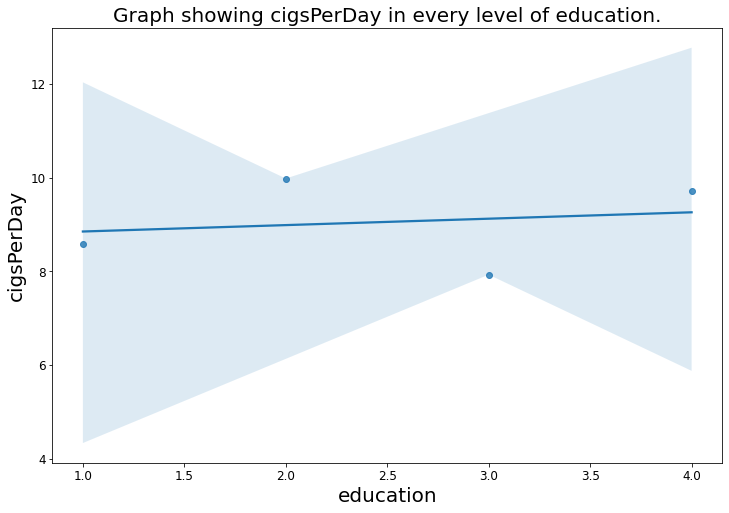

In [46]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_1["education"], y=graph_1['cigs_per_day'])
plt.title("Graph showing cigsPerDay in every level of education.", size=20)
plt.xlabel("education", size=20)
plt.ylabel("cigsPerDay", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* There is no linear relationship observed.
* Level 3 education shows the lowest mean.

**Which gender has more risk of coronary heart disease CHD**

In [47]:
data.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose',
       'ten_year_chd'],
      dtype='object')

In [48]:
#checking for which gender has more risk of coronary heart disease CHD

graph_2 = data.groupby("sex", as_index=False).ten_year_chd.sum()

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text major ticklabel objects>)

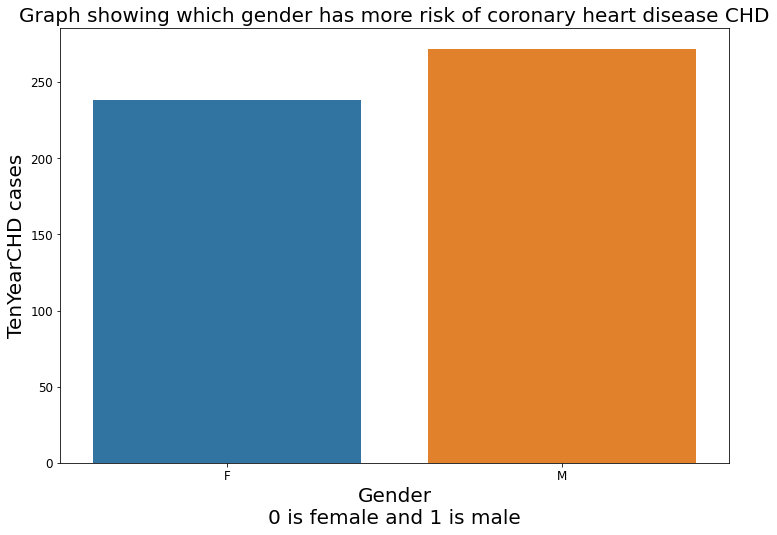

In [49]:
#Ploting the above values

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_2["sex"], y=graph_2['ten_year_chd'])
plt.title("Graph showing which gender has more risk of coronary heart disease CHD", size=20)
plt.xlabel("Gender\n0 is female and 1 is male",size=20)
plt.ylabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

According to this dataset, males have shown a slighly higher risk of coronary heart disease TenYearCHD.



(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

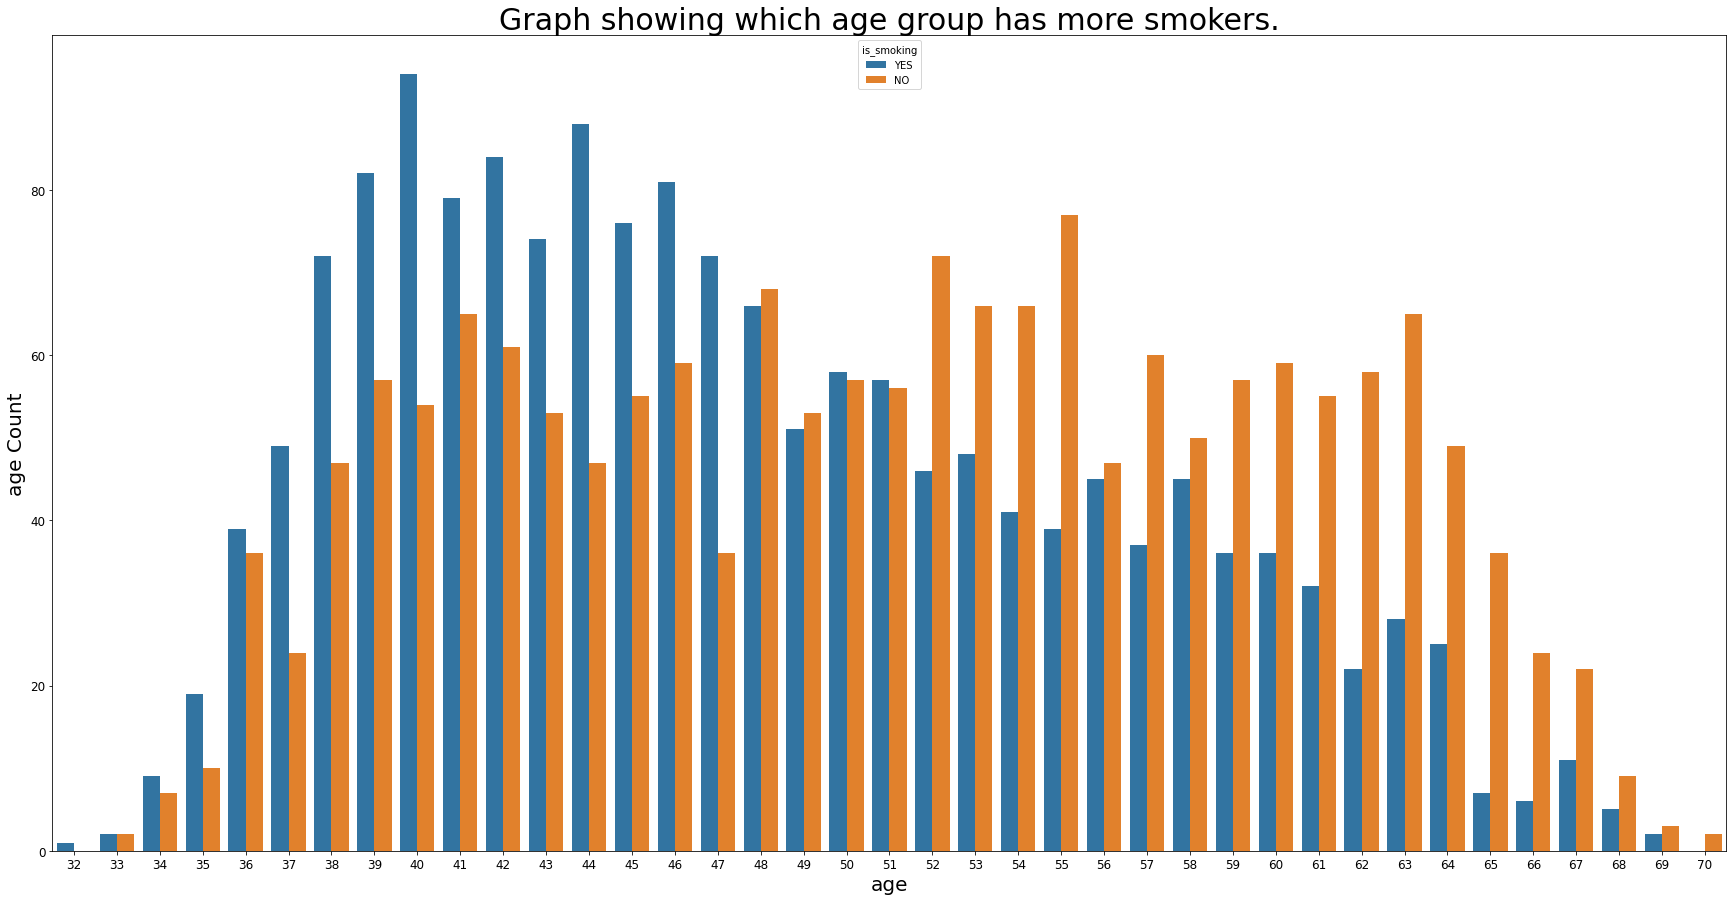

In [50]:
#Distribution of current smokers with respect to age
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x="age",data=data,hue="is_smoking")
plt.title("Graph showing which age group has more smokers.", size=30)
plt.xlabel("age", size=20)
plt.ylabel("age Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* Mid-age groups ranging from the age of 38 - 46 have more number of currentSmokers
* No currentSmokers observed below the age of 32
* maximum age for a currentSmokers is 70

**Relation between cigsPerDay and risk of coronary heart disease**

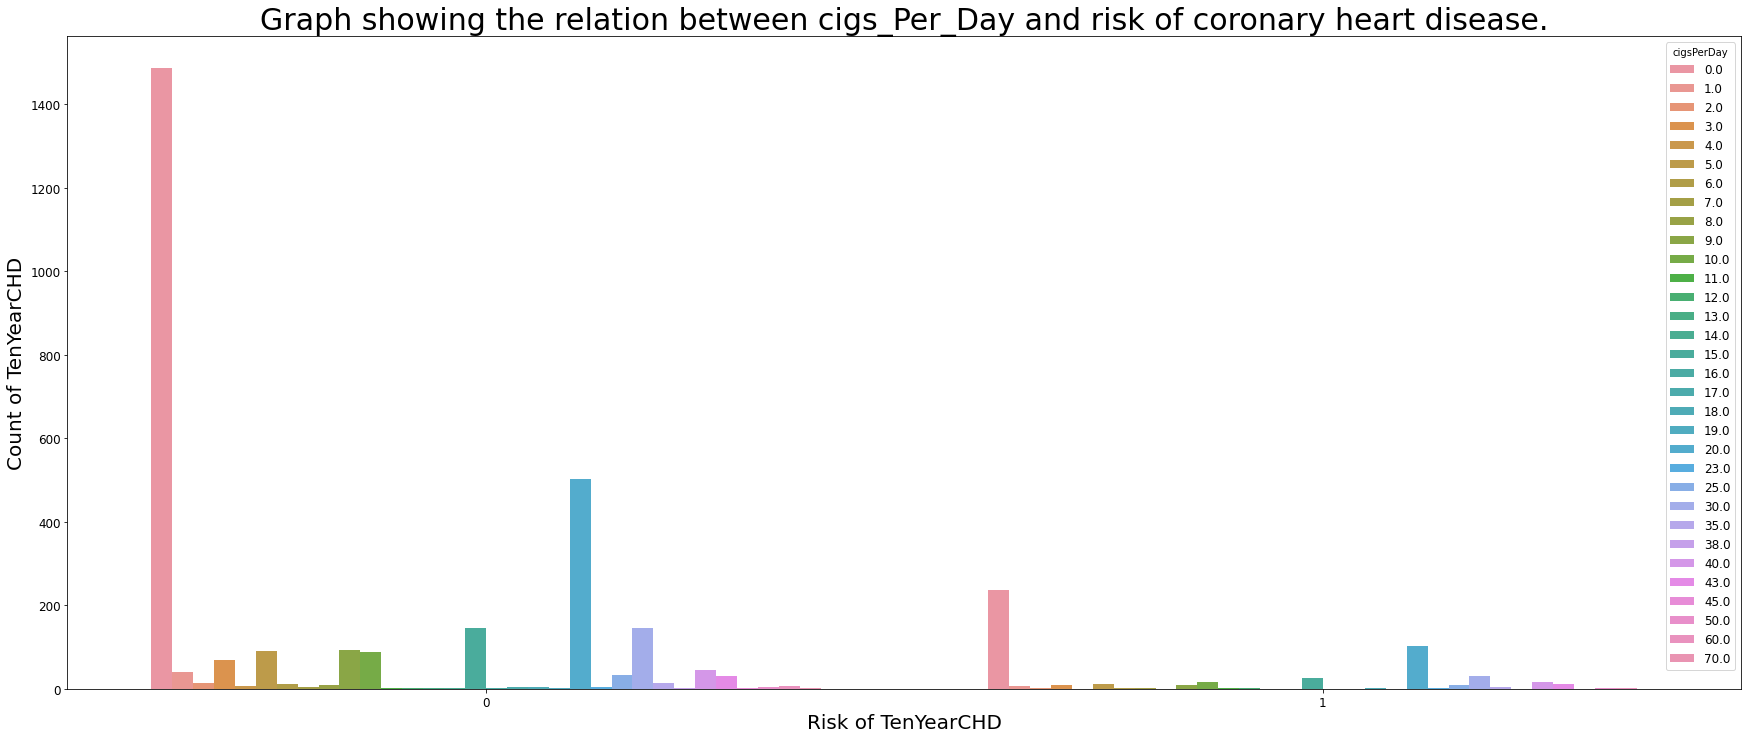

In [51]:
plt.figure(figsize=(30,12), facecolor='w')
sns.countplot(x='ten_year_chd',data=data,hue='cigs_per_day')
plt.legend(title='cigsPerDay', fontsize='large')
plt.title("Graph showing the relation between cigs_Per_Day and risk of coronary heart disease.", size=30)
plt.xlabel("Risk of TenYearCHD", size=20)
plt.ylabel("Count of TenYearCHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

* Low cigsPerDay comes with lower risk of CHD.
* Those who don't smoke, i.e., with a cigsPerDay of 0.0 has a really low risk of contracting the disease
* Although that is the case, low cigsPerDay doesn't actually guarantee a much lower risk of CHD

## **Relation between sysBP and risk of CHD.**

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

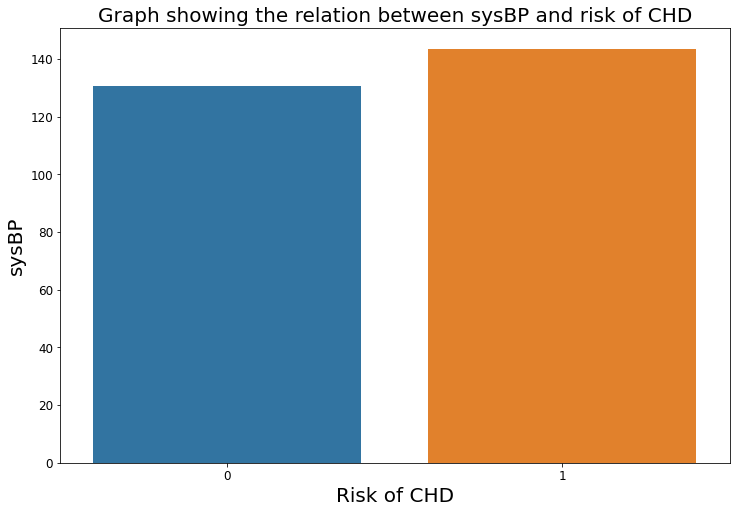

In [52]:
# Grouping up the data and ploting it

graph_3 = data.groupby('ten_year_chd' ,as_index=False).systolic_bp.mean()

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_3['ten_year_chd'], y=graph_3['systolic_bp'])
plt.title("Graph showing the relation between sysBP and risk of CHD", size=20)
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("sysBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

(array([ 60.,  70.,  80.,  90., 100., 110., 120., 130., 140., 150.]),
 <a list of 10 Text major ticklabel objects>)

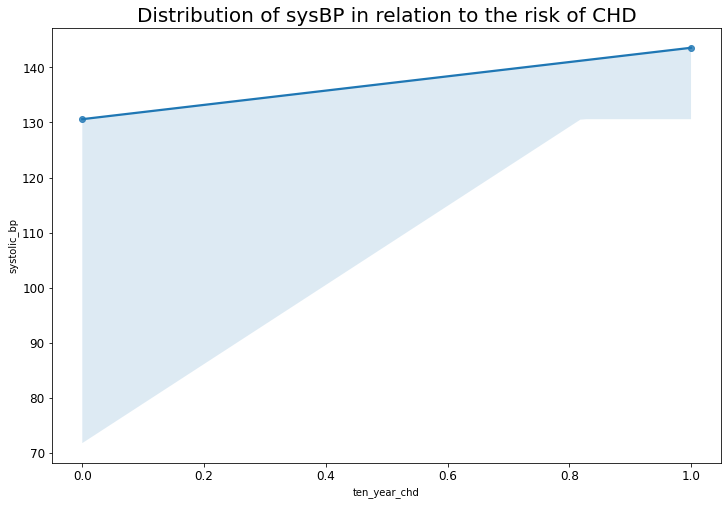

In [53]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_3['ten_year_chd'], y=graph_3['systolic_bp'])
plt.title("Distribution of sysBP in relation to the risk of CHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* Minor relation of higher risk of TenYearCHD found with higher sysBP
* Majority of people with sysBP ranging from 72 - 130 has lower chance of contracting the disease.

## **Relation between diaBP and risk of CHD**

In [54]:
data.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose',
       'ten_year_chd'],
      dtype='object')

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

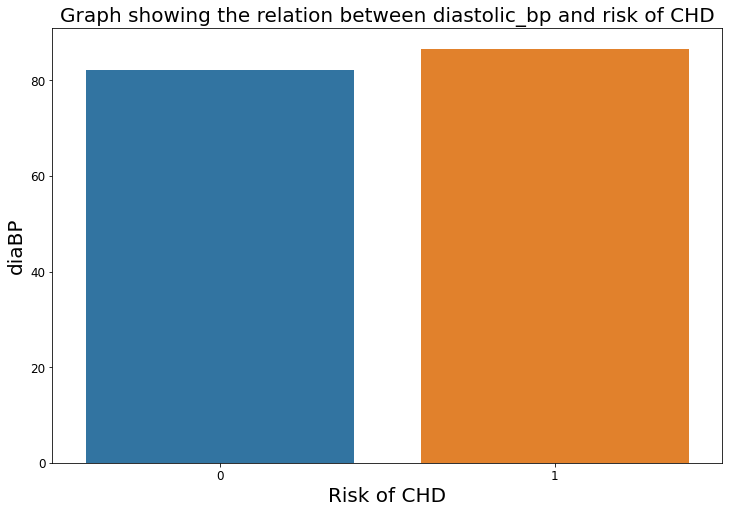

In [55]:
# Grouping up the data and ploting it

graph_4 = data.groupby('ten_year_chd', as_index=False).diastolic_bp.mean()

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_4['ten_year_chd'], y=graph_4["diastolic_bp"])
plt.title("Graph showing the relation between diastolic_bp and risk of CHD", size=20)
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("diaBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

(array([40., 50., 60., 70., 80., 90.]),
 <a list of 6 Text major ticklabel objects>)

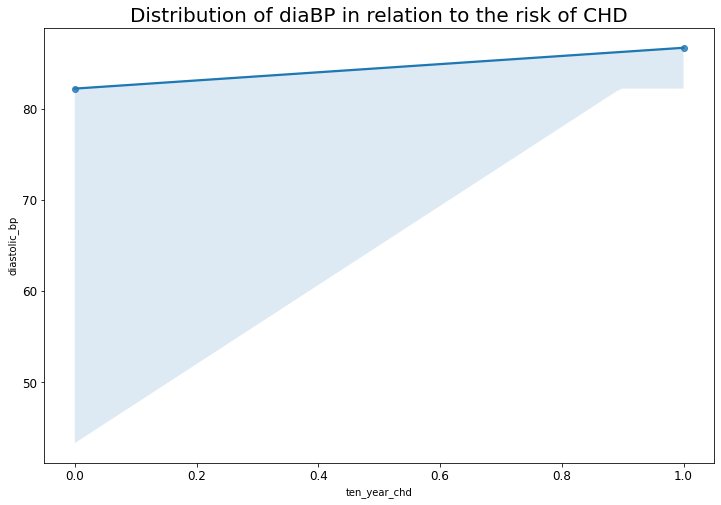

In [56]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_4['ten_year_chd'], y=graph_4['diastolic_bp'])
plt.title("Distribution of diaBP in relation to the risk of CHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* Minor relation found between higher risk of TenYearCHD with higher diaBP similar to the previous one
* Majority of people with diaBP ranging upto 80.0 has lower chance of contracting the disease.

### **Relation between age and totChol**

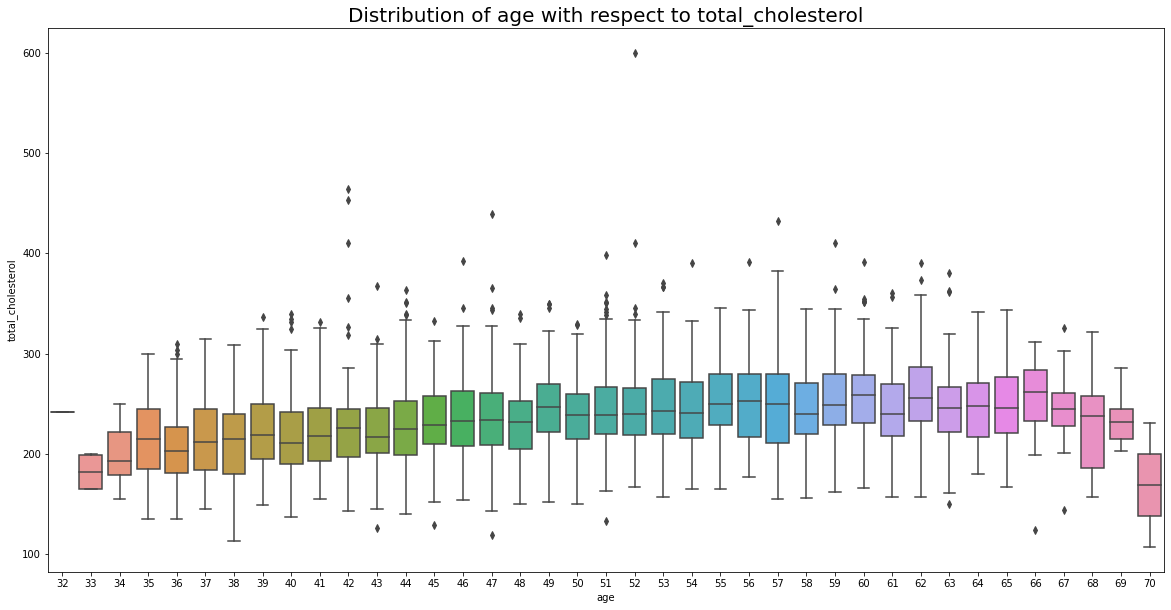

In [57]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(x="age",y='total_cholesterol',data=data)
plt.title("Distribution of age with respect to total_cholesterol", size=20)
plt.show()

The boxplots are shifted in an upwardly manner suggesting that aged people have more cholesterol (bad cholesterol in general)

### **3. Multivariate Analysis**
Relationship between age and cigsPerDay, totChol, glucose.

In [58]:
data.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose',
       'ten_year_chd'],
      dtype='object')

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

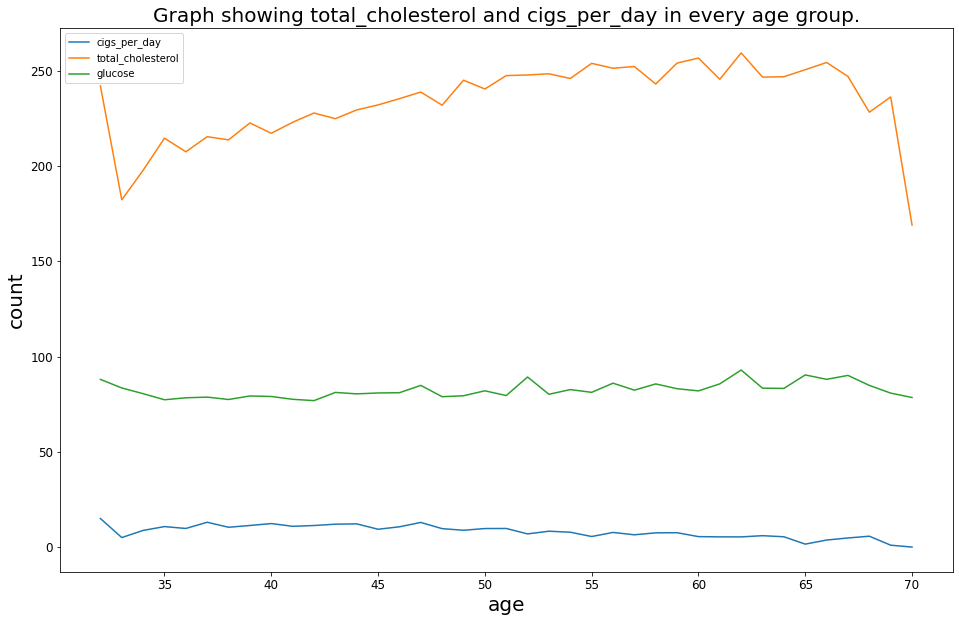

In [59]:
#Plotting a linegraph to check the relationship between age and cigsPerDay, totChol, glucose.

graph_5 = data.groupby("age").cigs_per_day.mean()
graph_6 = data.groupby("age").total_cholesterol.mean()
graph_7 = data.groupby("age").glucose.mean()

plt.figure(figsize=(16,10), facecolor='w')
sns.lineplot(data=graph_5, label='cigs_per_day')
sns.lineplot(data=graph_6, label='total_cholesterol')
sns.lineplot(data=graph_7, label="glucose")
plt.title("Graph showing total_cholesterol and cigs_per_day in every age group.", size=20)
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

* There is a minor relation between totChol and glucose.
* totChol has a steep, linear and inverse graph for lower ranges of age
* cigsPerDay has a fairly parallel relationship with age

**Distribution of sysBP vs diaBP with respect to is_smoking and sex attributes**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


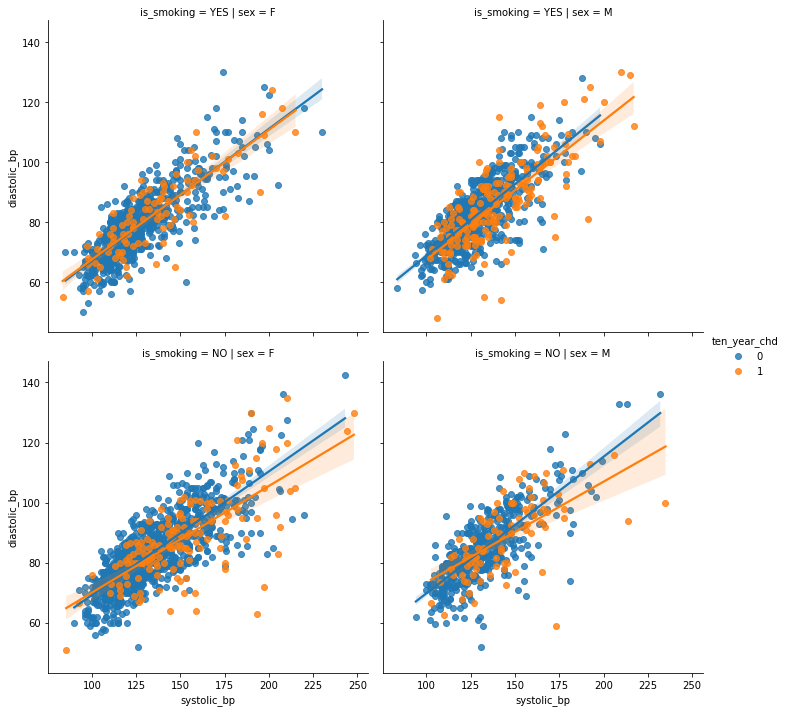

In [60]:
#sysBP vs diaBP with respect to is_smoking and sex attributes
#plt.figure(figsize=(18, 9), facecolor='w')
sns.lmplot('systolic_bp', 'diastolic_bp', 
           data=data,
           hue='ten_year_chd',
           col="sex",row='is_smoking')
plt.show()


The above graph plots the relationship between systolic blood pressure and diastolic blood pressure for patients based on their gender and whether they are current smokers or not and plots the best fit line




##3. Data Transformation

### Researching more on heart diseases, I have found that pulse pressure, which is the difference between systolic and diastolic BP has a large impact on CHD. Hence we can add PP (pulse pressure) which will carry values of both systolic and diastolic BP in one column.

In [61]:
data.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose',
       'ten_year_chd'],
      dtype='object')

In [62]:
# Adding pulse pressure as a column
data['pulsePressure'] = data['systolic_bp'] - data['diastolic_bp']

### As we consider the difference in systolic and diastolic BP to calculate pulse pressure, we can now drop the systolic and diastolic BP columns

In [63]:
# Dropping the systolic and diastolic BP columns
data.drop(['systolic_bp','diastolic_bp'], axis = 1, inplace = True)

### We can also drop the 'is_smoking' column, if cigarettes per day is more than 0 then the is_smoking column is 1 (YES). Hence, they both have the same meaning.

In [64]:
# Dropping the 'is_smoking' column
data.drop('is_smoking', axis = 1, inplace = True)

## **Feature Selection**

In [65]:
data.columns

Index(['age', 'education', 'sex', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'bmi', 'heart_rate', 'glucose', 'ten_year_chd', 'pulsePressure'],
      dtype='object')

In [66]:
data = data.loc[:, ['age','education','cigs_per_day','bp_meds','prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol','bmi', 'heart_rate', 'glucose', 'pulsePressure','sex',
                  'ten_year_chd']]

In [67]:
data

,age,education,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulsePressure,sex,ten_year_chd
0,64,2.0,3.0,0.0,0,0,0,221.0,25.38,90.0,80.0,63.0,F,1
1,36,4.0,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,70.0,M,0
2,46,1.0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,45.0,F,0
3,50,1.0,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,70.0,M,1
4,64,1.0,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,51.5,F,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,0.0,0.0,0,0,0,261.0,29.28,70.0,103.0,44.5,F,0
3386,46,1.0,0.0,0.0,0,0,0,199.0,21.96,80.0,84.0,46.0,F,0
3387,44,3.0,3.0,0.0,0,1,0,352.0,28.92,73.0,72.0,45.0,M,1
3388,60,1.0,0.0,0.0,0,1,0,191.0,23.01,80.0,85.0,62.0,M,0


In [69]:
#To idenfify the features that have larger contribution towards the outcome variable, TenYearCHD
X=data.iloc[:,0:13]
y=data.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)

X -  (3388, 13) 
y -  (3388,)


In [70]:
X

,age,education,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulsePressure,sex
0,64,2.0,3.0,0.0,0,0,0,221.0,25.38,90.0,80.0,63.0,F
1,36,4.0,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,70.0,M
2,46,1.0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,45.0,F
3,50,1.0,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,70.0,M
4,64,1.0,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,51.5,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,0.0,0.0,0,0,0,261.0,29.28,70.0,103.0,44.5,F
3386,46,1.0,0.0,0.0,0,0,0,199.0,21.96,80.0,84.0,46.0,F
3387,44,3.0,3.0,0.0,0,1,0,352.0,28.92,73.0,72.0,45.0,M
3388,60,1.0,0.0,0.0,0,1,0,191.0,23.01,80.0,85.0,62.0,M


In [71]:
y

0       1
1       0
2       0
3       1
4       0
       ..
3385    0
3386    0
3387    1
3388    0
3389    0
Name: ten_year_chd, Length: 3388, dtype: int64

In [77]:
# label nominal variables for tree based regression
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
X.sex = label.fit_transform(X.sex)

In [78]:
#Apply SelectKBest and extract top 10 features
best=SelectKBest(score_func=chi2, k=10)

In [79]:
fit=best.fit(X,y)

In [81]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [82]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

              Feature       Score
11      pulsePressure  628.157208
10            glucose  399.175814
7   total_cholesterol  259.748270
0                 age  253.373865
2        cigs_per_day  249.087793
5       prevalent_hyp   63.914317
6            diabetes   35.610463
3             bp_meds   25.188560
4    prevalent_stroke   15.901429
12                sex   14.050259
8                 bmi    9.058199


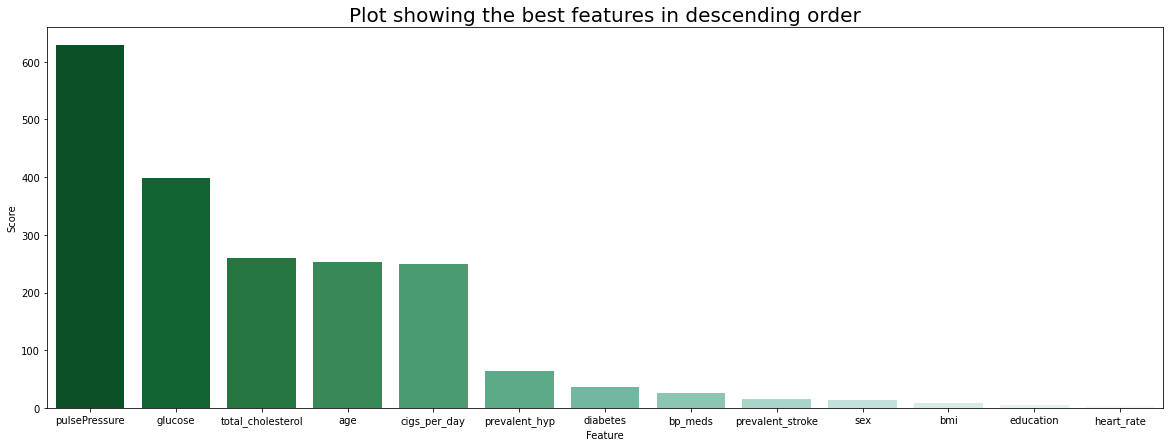

In [83]:
#To visualize feature selection
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores,palette='BuGn_r')
plt.title("Plot showing the best features in descending order", size=20)
plt.show()

This plot shows the Features and their respective chi-square test scores

In [84]:
#Select 15 features
features=scores["Feature"].tolist()[:10]
features

['pulsePressure',
 'glucose',
 'total_cholesterol',
 'age',
 'cigs_per_day',
 'prevalent_hyp',
 'diabetes',
 'bp_meds',
 'prevalent_stroke',
 'sex']

Only these features have strongest influence over the target variable. They are, in particular order:

* **pulsePressure**
* **glucose*** 
* **age**
* **cigs_per_day**
* **total_cholesterol**
* **prevalent_hyp**
* **diabetes**
* **bp_meds**
* **prevalent_stroke**
* **sex**

In [85]:
data=data[features]
data

,pulsePressure,glucose,total_cholesterol,age,cigs_per_day,prevalent_hyp,diabetes,bp_meds,prevalent_stroke,sex
0,63.0,80.0,221.0,64,3.0,0,0,0.0,0,F
1,70.0,75.0,212.0,36,0.0,1,0,0.0,0,M
2,45.0,94.0,250.0,46,10.0,0,0,0.0,0,F
3,70.0,94.0,233.0,50,20.0,1,0,0.0,0,M
4,51.5,77.0,241.0,64,30.0,0,0,0.0,0,F
...,...,...,...,...,...,...,...,...,...,...
3385,44.5,103.0,261.0,60,0.0,0,0,0.0,0,F
3386,46.0,84.0,199.0,46,0.0,0,0,0.0,0,F
3387,45.0,72.0,352.0,44,3.0,1,0,0.0,0,M
3388,62.0,85.0,191.0,60,0.0,1,0,0.0,0,M


# **Modelling:**

In [87]:
X

,age,education,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulsePressure,sex
0,64,2.0,3.0,0.0,0,0,0,221.0,25.38,90.0,80.0,63.0,0
1,36,4.0,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,70.0,1
2,46,1.0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,45.0,0
3,50,1.0,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,70.0,1
4,64,1.0,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,51.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,0.0,0.0,0,0,0,261.0,29.28,70.0,103.0,44.5,0
3386,46,1.0,0.0,0.0,0,0,0,199.0,21.96,80.0,84.0,46.0,0
3387,44,3.0,3.0,0.0,0,1,0,352.0,28.92,73.0,72.0,45.0,1
3388,60,1.0,0.0,0.0,0,1,0,191.0,23.01,80.0,85.0,62.0,1


In [88]:
y

0       1
1       0
2       0
3       1
4       0
       ..
3385    0
3386    0
3387    1
3388    0
3389    0
Name: ten_year_chd, Length: 3388, dtype: int64

**Choice of prediction model:**

* We are working on binary classification problem.
* Here we can start with a simple model, as a baseline model, which is interpretable, ie, Logistic Regression
* Try other standard binary classification models like  K nearest neighbors, Naive Bayes, decision tree classifier, and support vector machines.
* Use ensemble models, with hyperparameter tuning to check whether they give better predictions.

**Evaluation metrics:**
* Since the data we are dealing with is unbalanced, accuracy may not be the best evaluation metric to evaluate the model performance.
* Also, since we are dealing with data related to healthcare, False Negatives are of higher concern than False Positive
* In other words, it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected
* Considering these points in mind, it is decided that we use **Recall** as the model evaluation metric.


\begin{align}
        Recall = \frac{True Positive}{True Positive + False Negative}
    \end{align}

In [89]:
# function to get recall score
from sklearn.metrics import recall_score

def recall(actual,predicted):
  '''
  recall(actual,predicted)
  '''
  return recall_score(y_true=actual, y_pred=predicted, average='binary')

**Sampling:**

* Since we are dealing with unbalanced data, ie, only ~15% of the patients were diagnosed with coronary heart disease, we oversample the train dataset using SMOTE (Synthetic Minority Oversampling Technique).
* This ensures that the model has trained equally on all kinds of results, and it is not biased to one particular result.

In [90]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y, shuffle=True)

In [91]:
# Checking the train distribution of dependent variable
y_train.value_counts()

0    2014
1     357
Name: ten_year_chd, dtype: int64

In [92]:
# Proportion of positive outcomes in train dataset
357/(357+2014)

0.15056938000843526

In [93]:
# Checking the test distribution of dependent variable
y_test.value_counts()

0    864
1    153
Name: ten_year_chd, dtype: int64

In [94]:
# Proportion of positive outcomes in test dataset
153/(153+864)

0.1504424778761062

**Oversampling using SMOTE on the train dataset:**

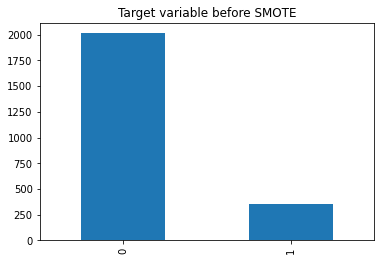

In [95]:
# visualize the target variable before SMOTE
y_train.value_counts().plot(kind='bar', title='Target variable before SMOTE')

In [96]:
# Oversampling using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Samples in the original dataset', len(y_train))
print('Samples in the resampled dataset', len(y_smote))

Samples in the original dataset 2371
Samples in the resampled dataset 4028


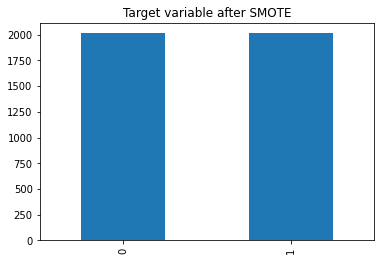

In [97]:
# visualize the target variable after SMOTE
y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE')

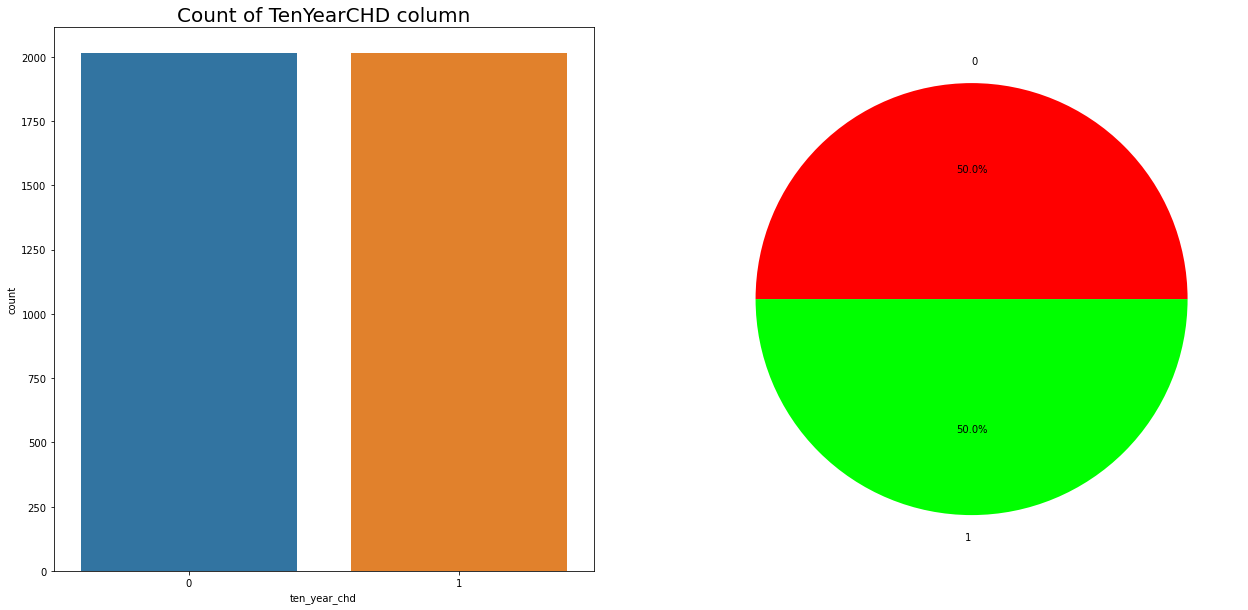

In [98]:
#Distribution of heart disease cases in the balanced dataset, the outcome variable
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x= y_smote, data=data)
plt.title("Count of TenYearCHD column", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(y_smote.value_counts(),autopct="%1.1f%%",labels=labels,colors=["red","lime"])
plt.show()

* We have successfully oversampled the minority class using SMOTE. Now the model we build will be able to learn from both the classes without any bias.

### Now both the classes are of equal size and the predictions will not be biased.

**Scaling the data:**
* Since the predictions from the distance based models will get affected if the attributes are in different ranges, we need to scale them.
* We can use StandardScaler to scale down the variables.
* The results obtained from scaling can be stored and used while building those models.
* Tree algorithms do not necessarily require scaling.

In [99]:
# Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_smote_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)

# Converting array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_smote_scaled = pd.DataFrame(X_smote_scaled,columns=X_smote.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [100]:
X_train_scaled.head()

,age,education,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulsePressure,sex
0,0.396434,2.014811,-0.759871,-0.180736,-0.092233,-0.680867,-0.166558,1.240934,-0.189124,-0.721623,0.009269,-1.317537,1.141027
1,-0.998316,0.056173,0.519955,-0.180736,-0.092233,-0.680867,-0.166558,0.053430,0.276103,0.356126,-0.156600,-1.183951,1.141027
2,1.442496,-0.923145,-0.759871,-0.180736,-0.092233,-0.680867,-0.166558,0.053430,0.860680,1.599682,-0.488340,-0.315640,-0.876404
3,-0.882086,-0.923145,0.519955,5.532932,-0.092233,1.468715,-0.166558,-0.327468,0.380840,0.190318,0.299541,0.085118,1.141027
4,0.163976,-0.923145,1.373172,-0.180736,-0.092233,-0.680867,-0.166558,2.025135,-1.777227,1.185163,-0.239535,-0.182054,-0.876404


In [101]:
X_smote_scaled.head()

,age,education,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulsePressure,sex
0,0.174454,2.203491,-0.786179,-0.256039,-0.07064,-0.710005,-0.185504,1.110183,-0.269429,-0.744696,-0.079620,-1.428776,1.264401
1,-1.270440,0.110445,0.501720,-0.256039,-0.07064,-0.710005,-0.185504,-0.062943,0.231562,0.379190,-0.200696,-1.303213,1.264401
2,1.258125,-0.936077,-0.786179,-0.256039,-0.07064,-0.710005,-0.185504,-0.062943,0.861080,1.675982,-0.442848,-0.487055,-0.790888
3,-1.150032,-0.936077,0.501720,4.881029,-0.07064,1.408440,-0.185504,-0.439228,0.344351,0.206285,0.132264,-0.110367,1.264401
4,-0.066362,-0.936077,1.360320,-0.256039,-0.07064,-0.710005,-0.185504,1.884889,-1.979620,1.243718,-0.261234,-0.361493,-0.790888


In [102]:
X_test_scaled.head()

,age,education,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulsePressure,sex
0,-1.631664,0.110445,0.931020,-0.256039,-0.07064,1.408440,-0.185504,0.246940,0.722062,0.379190,-0.654732,-0.738181,1.264401
1,-1.270440,0.110445,-0.786179,-0.256039,-0.07064,1.408440,-0.185504,-1.191800,3.447350,-0.485338,-0.200696,0.140758,-0.790888
2,0.656085,-0.936077,1.789620,-0.256039,-0.07064,-0.710005,-0.185504,-1.656623,0.541075,0.638548,0.677107,0.329102,1.264401
3,0.896901,-0.936077,-0.786179,-0.256039,-0.07064,1.408440,-0.185504,1.021646,1.776505,-0.485338,0.071726,0.956915,-0.790888
4,-0.668401,-0.936077,-0.786179,-0.256039,-0.07064,-0.710005,-0.185504,-0.948321,-1.077311,0.379190,-0.019082,-0.424274,-0.790888


**1. Logistic Regression**

In [103]:
# Importing logistic regression model
# Accuracy score is used to check the model accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [104]:
# Fitting model
lr_model = LogisticRegression()

In [105]:
# training the model
lr_model.fit(X_smote_scaled, y_smote)

LogisticRegression()

In [106]:
# Train predictions
lr_train_pred = lr_model.predict(X_smote_scaled)

In [107]:
# training set recall
lr_train_recall = recall(y_smote,lr_train_pred)
lr_train_recall

0.6722939424031777

In [108]:
# Test predictions
lr_test_pred = lr_model.predict(X_test_scaled)

In [109]:
# Test recall
lr_test_recall = recall(y_test,lr_test_pred)
lr_test_recall

0.5490196078431373

In [110]:
# Classification report
print(classification_report(y_test,lr_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77       864
           1       0.23      0.55      0.33       153

    accuracy                           0.66      1017
   macro avg       0.56      0.61      0.55      1017
weighted avg       0.79      0.66      0.70      1017



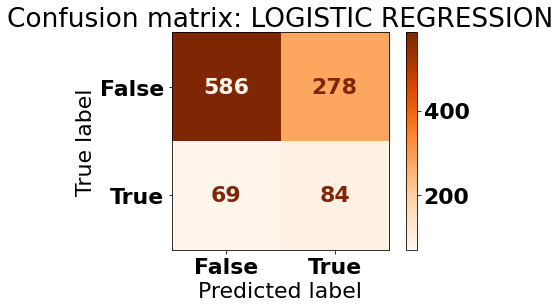

In [111]:
# Confusion matrix
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
lr_confusion_matrix = cm(y_test, lr_test_pred)
cm_display = cmd(confusion_matrix = lr_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: LOGISTIC REGRESSION')
plt.show()

**2. K Nearest Neighbors:**

In [112]:
# Importing knn classifier
from sklearn.neighbors import KNeighborsClassifier

In [113]:
# Value of k taken upto sqrt(n)
# Where n is no of records in the train dataset
# sqrt(4030) = 63.48
knn_test_res = []
knn_train_res = []
for k in range(1,65):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_smote_scaled, y_smote)
  knn_train_pred = knn_model.predict(X_smote_scaled)
  knn_train_recall = recall(y_smote,knn_train_pred)
  knn_test_pred = knn_model.predict(X_test_scaled)
  knn_test_recall = recall(y_test,knn_test_pred)
  knn_test_res.append(knn_test_recall)
  knn_train_res.append(knn_train_recall)

In [ ]:
# Plotting the train and test recalls for different values of k
plt.figure(figsize=(10,5))
x_ = range(1,65)
y1 = knn_train_res
y2 = knn_test_res
plt.plot(x_, y1, label='Train Recall')
plt.plot(x_, y2, label = 'Test Recall')
plt.xlabel('K')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [115]:
# Best k is where the test recall is the highest
best_k = knn_test_res.index(max(knn_test_res))+1
best_k

29

In [116]:
# building knn model with best parameters
knn_model = KNeighborsClassifier(n_neighbors=best_k)

In [117]:
# training the model
knn_model.fit(X_smote_scaled, y_smote)

KNeighborsClassifier(n_neighbors=29)

In [118]:
# Train predictions
knn_train_pred = knn_model.predict(X_smote_scaled)

In [119]:
# training set recall
knn_train_recall = recall(y_smote,knn_train_pred)
knn_train_recall

0.8619662363455809

In [120]:
# Test predictions
knn_test_pred = knn_model.predict(X_test_scaled)

In [121]:
# Test recall
knn_test_recall = recall(y_test,knn_test_pred)
knn_test_recall

0.6078431372549019

In [122]:
# Classification report
print(classification_report(y_test,knn_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.62      0.73       864
           1       0.22      0.61      0.32       153

    accuracy                           0.62      1017
   macro avg       0.56      0.61      0.53      1017
weighted avg       0.80      0.62      0.67      1017



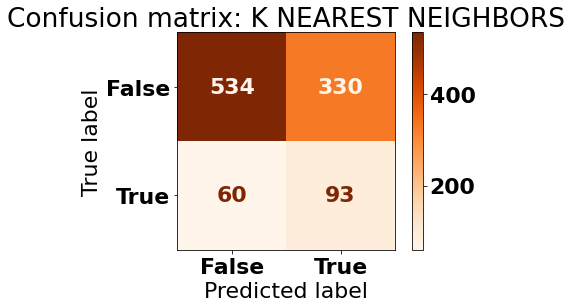

In [123]:
# Confusion matrix
knn_confusion_matrix = cm(y_test, knn_test_pred)
cm_display = cmd(confusion_matrix = knn_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: K NEAREST NEIGHBORS')
plt.show()

**3. Naive Bayes:**

In [124]:
# Importing naive Bayes classifier from sklearn
from sklearn.naive_bayes import GaussianNB

In [125]:
# Importing gridsearchcv for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [126]:
# Using stratified k fold cross validation so that each split 
# has almost equal proportion of classification results
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=4,
                                    n_repeats=3, 
                                    random_state=0)

In [127]:
# Fitting model
nb_model = GaussianNB()

In [128]:
# Max depth of dt without hyperparameter tuning = 28 and min samples leaf = 1
nb_model = GaussianNB()
nb_params = {'var_smoothing': np.logspace(0,-9, num=100)
             }

In [129]:
nb_gridsearch = GridSearchCV(nb_model,
                             nb_params,
                             cv=cv_method,
                             scoring= 'recall')
nb_gridsearch.fit(X_smote_scaled,y_smote)
nb_best_params = nb_gridsearch.best_params_

In [130]:
# model best parameters
nb_best_params

{'var_smoothing': 1.0}

In [131]:
# building knn model with best parameters
nb_model = GaussianNB(var_smoothing=nb_best_params['var_smoothing'])

In [132]:
# training the model
nb_model.fit(X_smote_scaled, y_smote)

GaussianNB(var_smoothing=1.0)

In [135]:
# Train predictions
nb_train_pred = nb_model.predict(X_smote_scaled)

In [136]:
# training set recall
nb_train_recall = recall(y_smote,nb_train_pred)
nb_train_recall

0.36047666335650447

In [137]:
# Test predictions
nb_test_pred = nb_model.predict(X_test_scaled)

In [138]:
# Test recall
nb_test_recall = recall(y_test,nb_test_pred)
nb_test_recall

0.29411764705882354

In [139]:
# Classification report
print(classification_report(y_test,nb_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       864
           1       0.29      0.29      0.29       153

    accuracy                           0.79      1017
   macro avg       0.58      0.58      0.58      1017
weighted avg       0.79      0.79      0.79      1017



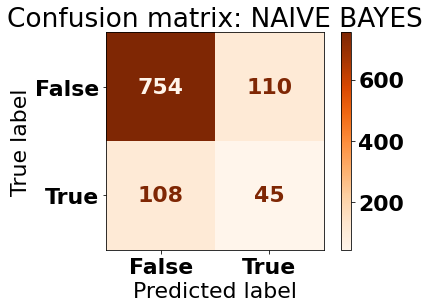

In [140]:
# Confusion matrix
nb_confusion_matrix = cm(y_test, nb_test_pred)
cm_display = cmd(confusion_matrix = nb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: NAIVE BAYES')
plt.show()

**4. Decision tree:**

In [141]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [142]:
# Max depth of dt without hyperparameter tuning = 28 and min samples leaf = 1
dt_model = DecisionTreeClassifier()
dt_params = {'max_depth':np.arange(1,10),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)
             }

In [143]:
# using gridsearchcv to find best parameters
dt_gridsearch = GridSearchCV(dt_model,
                             dt_params,
                             cv=cv_method,
                             scoring= 'recall')
dt_gridsearch.fit(X_smote,y_smote)
dt_best_params = dt_gridsearch.best_params_

In [144]:
# model best parameters
dt_best_params

{'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}

In [145]:
# building knn model with best parameters
dt_model = DecisionTreeClassifier(max_depth=dt_best_params['max_depth'],
                                  min_samples_split=dt_best_params['min_samples_split'],
                                  min_samples_leaf=dt_best_params['min_samples_leaf'])

In [146]:
# training the model 
dt_model.fit(X_smote_scaled, y_smote)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1)

In [147]:
# Train predictions
dt_train_pred = dt_model.predict(X_smote_scaled)

In [148]:
# training set recall
dt_train_recall = recall(y_smote,dt_train_pred)
dt_train_recall

0.8470705064548163

In [149]:
# Test predictions
dt_test_pred = dt_model.predict(X_test_scaled)

In [150]:
# Test recall
dt_test_recall = recall(y_test,dt_test_pred)
dt_test_recall

0.7647058823529411

In [151]:
# Classification report
print(classification_report(y_test,dt_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.46      0.61       864
           1       0.20      0.76      0.32       153

    accuracy                           0.50      1017
   macro avg       0.56      0.61      0.46      1017
weighted avg       0.81      0.50      0.57      1017



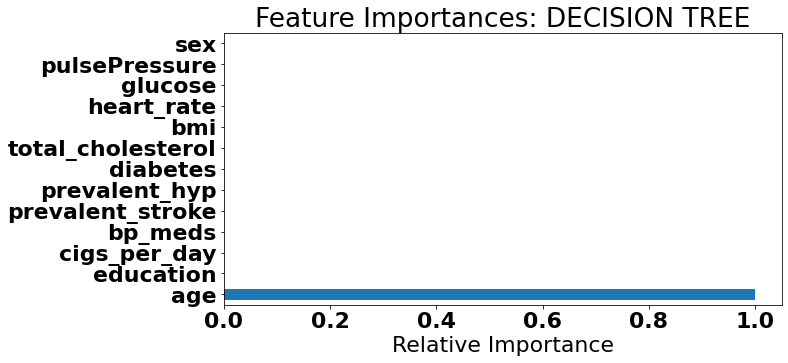

In [152]:
# Feature importances

dt_feat_imp = pd.Series(dt_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: DECISION TREE')
plt.xlabel('Relative Importance')
dt_feat_imp.nlargest(20).plot(kind='barh')

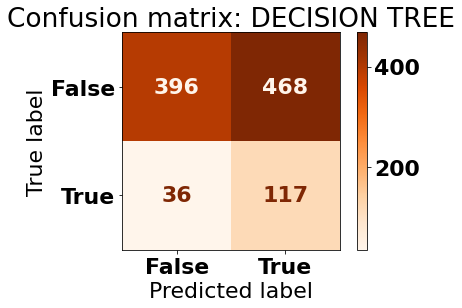

In [153]:
# Confusion matrix
dt_confusion_matrix = cm(y_test, dt_test_pred)
cm_display = cmd(confusion_matrix = dt_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: DECISION TREE')
plt.show()

**5. Support Vector Machines:**

In [154]:
# Importing Support vector classifier
from sklearn.svm import SVC

In [155]:
# SVM model parameters
svm_model = SVC()
svm_params = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.001, 0.0001],
              'kernel': ['rbf']
             }

In [156]:
# Using gridsearchcv to find best parameters
svm_gridsearch = GridSearchCV(svm_model,
                              svm_params,
                              cv=cv_method,
                              scoring= 'recall')
svm_gridsearch.fit(X_smote_scaled,y_smote)
svm_best_params = svm_gridsearch.best_params_

In [157]:
# model best parameters
svm_best_params

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [158]:
# building knn model with best parameters
svm_model = SVC(C=svm_best_params['C'],
                gamma=svm_best_params['gamma'],
                kernel=svm_best_params['kernel']
                )

In [159]:
# training the model 
svm_model.fit(X_smote_scaled, y_smote)

SVC(C=10, gamma=0.01)

In [160]:
# Train predictions
svm_train_pred = svm_model.predict(X_smote_scaled)

In [161]:
# training set recall
svm_train_recall = recall(y_smote,svm_train_pred)
svm_train_recall

0.8123138033763655

In [162]:
# Test predictions
svm_test_pred = svm_model.predict(X_test_scaled)

In [163]:
# Test recall
svm_test_recall = recall(y_test,svm_test_pred)
svm_test_recall

0.5163398692810458

In [164]:
# Classification report
print(classification_report(y_test,svm_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74       864
           1       0.20      0.52      0.29       153

    accuracy                           0.62      1017
   macro avg       0.54      0.58      0.52      1017
weighted avg       0.78      0.62      0.67      1017



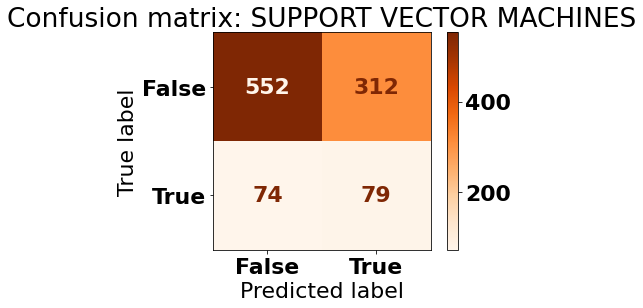

In [165]:
# Confusion matrix
svm_confusion_matrix = cm(y_test, svm_test_pred)
cm_display = cmd(confusion_matrix = svm_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: SUPPORT VECTOR MACHINES')
plt.show()

**6. Random forests:**

In [166]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [168]:
# random forest model
rf_model = RandomForestClassifier(random_state=0)
rf_params = {'n_estimators':[500],                    # limited due to computational power availability
             'max_depth':np.arange(1,6),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)}

In [169]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
# using Halving gridsearchcv to find best parameters
rf_gridsearch= HalvingGridSearchCV(rf_model,rf_params,cv=cv_method,scoring='recall')
rf_gridsearch.fit(X_smote,y_smote)
rf_best_params = rf_gridsearch.best_params_

In [ ]:
# best parameters for random forests
rf_best_params

In [ ]:
# Fitting RF model with best parameters
rf_model = RandomForestClassifier(n_estimators=rf_best_params['n_estimators'],
                                  min_samples_leaf=rf_best_params['min_samples_leaf'],
                                  min_samples_split=rf_best_params['min_samples_split'],
                                  max_depth=rf_best_params['max_depth'],
                                  random_state=0)

In [ ]:
# fit
rf_model.fit(X_smote,y_smote)

In [ ]:
# train predictions
rf_train_pred = rf_model.predict(X_smote)

In [ ]:
# train recall
rf_train_recall = recall(y_smote,rf_train_pred)
rf_train_recall

In [ ]:
# Test predictions
rf_test_pred = rf_model.predict(X_test)

In [ ]:
# test recall
rf_test_recall = recall(y_test,rf_test_pred)
rf_test_recall

In [ ]:
# Classification report
print(classification_report(y_test,rf_test_pred))

In [ ]:
# Feature importances

rf_feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: RANDOM FORESTS')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

In [ ]:
# Confusion matrix
rf_confusion_matrix = cm(y_test, rf_test_pred)
cm_display = cmd(confusion_matrix = rf_confusion_matrix, display_labels = [False, True])

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: RANDOM FORESTS')
plt.show()

**7. XG Boost:**

In [ ]:
# Importing xgboost
import xgboost as xgb

In [ ]:
# XGBOOST model
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_params = {'n_estimators':[500],                    # limited due to computational power availability
             'max_depth':[1],
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)}

In [ ]:
# using gridsearchcv to find best parameters
xgb_gridsearch = HalvingGridSearchCV(xgb_model,xgb_params,cv=cv_method,scoring='recall')
xgb_gridsearch.fit(X_smote_scaled,y_smote)
xgb_best_params = xgb_gridsearch.best_params_

In [ ]:
# best parameters for xgboost classifier
xgb_best_params

In [ ]:
# fit
xgb_model.fit(X_smote_scaled,y_smote)

In [ ]:
# train predictions
xgb_train_pred = xgb_model.predict(X_smote_scaled)
xgb_train_pred = [round(value) for value in xgb_train_pred]

In [ ]:
# train recall
xgb_train_recall = recall(y_smote,xgb_train_pred)
xgb_train_recall

In [ ]:
# Test predictions
xgb_test_pred = xgb_model.predict(X_test_scaled)
xgb_test_pred = [round(value) for value in xgb_test_pred]

In [ ]:
# test recall
xgb_test_recall = recall(y_test,xgb_test_pred)
xgb_test_recall

In [ ]:
# Classification report
print(classification_report(y_test,xgb_test_pred))

In [ ]:
# Feature importances

xgb_feat_imp = pd.Series(xgb_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: XG BOOST')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

In [ ]:
print(classification_report(y_test,xgb_test_pred,target_names=['Negative','Positive']))

In [ ]:
# Confusion matrix
xgb_confusion_matrix = cm(y_test, xgb_test_pred)
cm_display = cmd(confusion_matrix = xgb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: XG BOOST')
plt.show()

# **Modeling summary:**

* We trained 7 unique Machine Learning models using the training dataset, and hyperparameter tuning was used in some models to improve the model performance.
* To build the models, missing values were handled, feature engineering and feature selection was performed, and the training dataset was oversampled using SMOTE to reduce bias on one outcome.
* Recall was chosen as the model evaluation metric because it was very important that we reduce the false negatives.
* Initial set of predictions were obtained using the baseline model, ie, logistic regression model, and other commonly used classification models were also build in search of better predictions.

The Recall values for the models are as follows:

In [ ]:
# Recall results
print('Logistic Regression train Recall       :',lr_train_recall)
print('Logistic Regression test Recall        :',lr_test_recall)
print('--x--')
print('K Nearest Neighbors train Recall       :',knn_train_recall)
print('K Nearest Neighbors test Recall        :',knn_test_recall)
print('--x--')
print('Naive Bayes train Recall               :',nb_train_recall)
print('Naive Bayes test Recall                :',nb_test_recall)
print('--x--')
print('Decision Tree train Recall             :',dt_train_recall)
print('Decision Tree test Recall              :',dt_test_recall)
print('--x--')
print('Support Vector Machine train Recall    :',svm_train_recall)
print('Support Vector Machine test Recall     :',svm_test_recall)
print('--x--')
print('Random Forests train Recall            :',rf_train_recall)
print('Random Forests test Recall             :',rf_test_recall)
print('--x--')
print('XG Boost train Recall                  :',xgb_train_recall)
print('XG Boost test Recall                   :',xgb_test_recall)
print('--x--')

In [ ]:
# Plotting Recall scores

ML_models = ['Logistic Regression','K Nearest Neighbors','Naive Bayes','Decision Tree','Support Vector Machines','Random Forests','XG Boost']
train_recalls = [lr_train_recall,knn_train_recall,nb_train_recall,dt_train_recall,svm_train_recall,rf_train_recall,xgb_train_recall]
test_recalls = [lr_test_recall,knn_test_recall,nb_test_recall,dt_test_recall,svm_test_recall,rf_test_recall,xgb_test_recall]
  
X_axis = np.arange(len(ML_models))

plt.figure(figsize=(10,5))
plt.barh(X_axis - 0.2, train_recalls, 0.4, label = 'Train Recall')
plt.barh(X_axis + 0.2, test_recalls, 0.4, label = 'Test Recall')
  
plt.yticks(X_axis,ML_models)
plt.xlabel("Recall score")
plt.title("Recall score for each model")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Legend')
plt.show()

**The decision tree has the lowest test recall.**

* Predicting the risk of coronary heart disease is critical for reducing fatalities caused by this illness. We can avert deaths by taking the required medications and precautions if we can foresee the danger of this sickness ahead of time.
* It is critical that the model we develop has a high recall score. It is OK if the model incorrectly identifies a healthy patient as a high risk patient because it will not result in death, but if a high risk patient is incorrectly labelled as healthy, it may result in fatality.
* We were able to create a model with a recall of just 0.77 because of limitations in computational power availability. This indicates that out of 100 individuals with the illness, our model will be able to classify only 77 as high risk patients, while the remaining 33 will be misclassified.
* Future developments must include a strategy to improve the model recall score, enabling us to save even more lives from this disease.